In [43]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import numpy as np
from hilbert import decode, encode
from tqdm import tqdm
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
os.environ["COMET_API_KEY"] = "uM0HPEvEu6OyX3dTEuB4Fihgz"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(5, 8, 3,padding="same")
        self.pool = nn.AvgPool2d(3, 2)
        self.conv2 = nn.Conv2d(8, 16, 3,padding="same")
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 64, 3)
        self.conv5 = nn.Conv2d(64, 128, 2)
        self.fc1 = nn.Linear(1152, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 16)
        self.fc6 = nn.Linear(16, 8)
        
        self.batch1=nn.BatchNorm2d(8)
        self.batch2=nn.BatchNorm2d(16)
        self.batch3=nn.BatchNorm2d(32)
        self.batch4=nn.BatchNorm2d(64)
        
        self.dropout1=nn.Dropout2d(p=0.2)
        

    def forward(self, x):
        x = self.batch1(F.relu(self.conv1(self.dropout1(x))))
        x = self.pool(self.batch2(F.relu(self.conv2(x))))
        x = self.pool(self.batch3(F.relu(self.conv3(self.dropout1(x)))))
        x = self.batch4(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x



cuda:0


In [2]:
df = pd.read_parquet("data/F_BTCUSDT_1m.parquet")
tc = ["Open",
"High",
"Low",
"Close",
"Volume"]
for i in tc:
    df[i]=df[i].astype("float")

In [3]:
df

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAsset,NumberOfTrades,TakerBuybaseassetvolume,TakerBuyquoteassetvolume,Ignore
0,2019-10-01 00:00:00,8209.67,8216.04,8209.22,8211.91,3.282,1569877259999,26949.57673,33,1.650,13550.96373,0
1,2019-10-01 00:01:00,8215.93,8216.90,8210.87,8215.00,2.821,1569877319999,23173.71997,18,2.711,22270.40007,0
2,2019-10-01 00:02:00,8215.00,8215.00,8213.00,8214.58,1.241,1569877379999,10192.89112,27,0.400,3285.73147,0
3,2019-10-01 00:03:00,8214.31,8215.00,8213.04,8214.72,0.548,1569877439999,4501.69900,23,0.361,2965.55218,0
4,2019-10-01 00:04:00,8214.72,8215.00,8214.72,8215.00,1.055,1569877499999,8666.78673,17,0.948,7787.78280,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1583995,2022-10-04 23:55:00,20357.50,20375.00,20355.20,20355.30,954.064,1664916959999,19430279.00560,5093,509.076,10367821.83960,0
1583996,2022-10-04 23:56:00,20355.20,20370.70,20353.30,20353.30,371.426,1664917019999,7562153.35400,3115,163.501,3328771.53970,0
1583997,2022-10-04 23:57:00,20353.40,20355.30,20323.50,20330.00,1098.885,1664917079999,22345525.97800,6736,442.725,9001848.01150,0
1583998,2022-10-04 23:58:00,20329.90,20360.40,20329.90,20344.00,595.273,1664917139999,12111296.57470,3793,384.144,7815856.88280,0


In [44]:
from comet_ml.integration.pytorch import load_model
model = Net()

# Load the model state dict from a Comet Experiment
checkpoint = load_model("experiment://97ba96d310274c4e87901f2352800402/4_layer_w_volume_classic_CNN_mse_line_3")
model.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
model.to(device)


Net(
  (conv1): Conv2d(5, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): AvgPool2d(kernel_size=3, stride=2, padding=0)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=8, bias=True)
  (batch1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affin

In [45]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
class HilbertImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.img_labels = pd.read_parquet(os.path.join(self.img_dir, annotations_file))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, -1])
        image = np.load(img_path)
        label = self.img_labels.iloc[idx, :-1].values.astype("float64")
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
train_ds = HilbertImageDataset(annotations_file="target_line_3.parquet",img_dir="imgs/train_4layer_w_volume/")
test_ds = HilbertImageDataset(annotations_file="target_line_3.parquet",img_dir="imgs/test_4layer_w_volume/")
trainloader = DataLoader(train_ds, batch_size=64, shuffle=True)
testloader = DataLoader(test_ds, batch_size=64, shuffle=True)

In [6]:
dataiter = iter(testloader)
cols = list(pd.concat([pd.read_parquet("imgs/train_4layer_w_volume/target_line_3.parquet"),
pd.read_parquet("imgs/test_4layer_w_volume/target_line_3.parquet")]).iloc[:,:-1].columns)
fcs = [[i+"_target",i+"_pred"] for i in cols]
fullcols = [item for sublist in fcs for item in sublist]
tl = []
for images, labels in dataiter:
    images = images.float().to(device)
    labels = labels.float().to(device)
    outputs = model(images)
    evaldf = pd.DataFrame(labels.cpu(),columns=[i+"_target" for i in cols]).join(pd.DataFrame(outputs.cpu().tolist(),columns=[i+"_pred" for i in cols]))
    tl.append(evaldf[fullcols])
tf = pd.concat(tl)

In [7]:
ohlc_mean,ohlc_std,vol_mean,vol_std = 28001.938870730588, 17834.47169281324, 248.00923831004107, 426.5438396373735

In [64]:
data = np.array(range(32*32))
locs = decode(data, 2, 5)

position_history = []
output_history=[]
verbose = 1
open_position=False
profit_margin=1.0
current_position={}
for i in tqdm(range(1424680,len(df))):
    if verbose>0:
        print(profit_margin)
    current_ts = df.iloc[i]
    if not open_position:
        pos_dict_open = {}
        temp_f = df.iloc[i-32*32:i]
        lv = temp_f.Close.iloc[-1]
        o1 = np.zeros((5,32,32))
        vals = temp_f[["Open","High","Low","Close","Volume"]].values
        for j in range(len(data)):
            o1[:,locs[j][0],locs[j][1]] = vals[j]
        ohlc = o1[:4,:,:]
        vol = o1[-1:,:,:]
        ohlc = (ohlc-ohlc_mean)/ohlc_std
        vol = (vol-vol_mean)/vol_std
        on1 = torch.Tensor(np.concatenate((ohlc,vol),axis=0).reshape((1,*o1.shape)))
        output=model(on1.to(device)).tolist()[0]
        output_history.append(output)
        short = min(output[::2])
        long = max(output[1::2])
        short_index = output.index(short)//2
        long_index = output.index(long)//2
        low_slope = ((-((output[2]/output[0])-1)) + (-((output[4]/output[2])-1)) + (-((output[6]/output[4])-1)))/3
        high_slope = ((((output[3]/output[1])-1)) + (((output[5]/output[3])-1)) + (((output[7]/output[5])-1)))/3


        if abs(low_slope)<abs(high_slope):
            #print(i)
            open_position=True
            if long_index==0:
                stop_loss=output[0]/5
            stop_loss = min(output[::2][:long_index])/5
            pos_dict_open["status"]="Opened"
            pos_dict_open["time"]=current_ts["OpenTime"]
            pos_dict_open["price"]=current_ts["Close"]
            pos_dict_open["type"]="long"
            current_position["type"]="long"
            pos_dict_open["take_profit"]=lv*(1+long)
            current_position["take_profit"]=lv*(1+long)
            pos_dict_open["stop_loss"]=lv*(1+(stop_loss))
            current_position["stop_loss"]=lv*(1+(stop_loss))
            pos_dict_open["take_profit_ratio"]=(1+long)
            current_position["take_profit_ratio"]=(1+long)
            pos_dict_open["stop_loss_ratio"]=(1+(stop_loss))
            current_position["stop_loss_ratio"]=(1+(stop_loss))
            pos_dict_open["result"]=None
            if verbose==2:
                print("\nOpened Position",pos_dict_open)
        
        elif abs(high_slope)<abs(low_slope):
            #print(i)
            open_position=True
            if short_index == 0:
                stop_loss = output[1]/5
            else:
                stop_loss = max(output[1::2][:short_index])/5
            pos_dict_open["status"]="Opened"
            pos_dict_open["time"]=current_ts["OpenTime"]
            pos_dict_open["price"]=current_ts["Close"]
            pos_dict_open["type"]="short"
            current_position["type"]="short"
            pos_dict_open["take_profit"]=lv*(1+short)
            current_position["take_profit"]=lv*(1+short)
            pos_dict_open["stop_loss"]=lv*(1+(stop_loss))
            current_position["stop_loss"]=lv*(1+(stop_loss))
            pos_dict_open["take_profit_ratio"]=(1-short)
            current_position["take_profit_ratio"]=(1-short)
            pos_dict_open["stop_loss_ratio"]=(1-(stop_loss))
            current_position["stop_loss_ratio"]=(1-(stop_loss))
            pos_dict_open["result"]=None
            if verbose==2:
                print("\nOpened Position",pos_dict_open)

        position_history.append(pos_dict_open)
        
        #print(current_position)
        continue #skip current candle
    elif open_position:
        pos_dict_closed={}
        current = df.iloc[i]
        if current_position["type"]=="long":
            if current.Low<current_position["stop_loss"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["Low"]
                pos_dict_closed["result"] = "loss"
                profit_margin*=current_position["stop_loss_ratio"]*0.99985

                open_position=False
            elif current.High>current_position["take_profit"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["High"]
                pos_dict_closed["result"] = "profit"
                profit_margin*=current_position["take_profit_ratio"]*0.99985
                open_position=False
        elif current_position["type"]=="short":
            if current.High>current_position["stop_loss"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["High"]
                pos_dict_closed["result"] = "loss"
                profit_margin*=current_position["stop_loss_ratio"]*0.99985
                open_position=False
            elif current.Low<current_position["take_profit"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["Low"]
                pos_dict_closed["result"] = "profit"
                profit_margin*=current_position["take_profit_ratio"]*0.99985

                open_position=False
        else:
            print("Error")
            break
        
        if not open_position:
            pos_dict_closed["type"] = current_position["type"]
            pos_dict_closed["take_profit"] = current_position["take_profit"]
            pos_dict_closed["stop_loss"] = current_position["stop_loss"]
            pos_dict_closed["take_profit_ratio"] = current_position["take_profit_ratio"]
            pos_dict_closed["stop_loss_ratio"] = current_position["stop_loss_ratio"]
            position_history.append(pos_dict_closed)
            if verbose==2:
                print("\nClosed Position", pos_dict_closed)
        
                
        

    if i>=1424681+1440*30:
        break


  0%|                                    | 200/159320 [00:00<02:37, 1013.11it/s]

1.0
1.0
1.0017474522576435
1.0017474522576435
1.0012337897224752
1.0012337897224752
1.0012337897224752
1.0006504671859713
1.0006504671859713
1.000107053456479
1.000107053456479
0.9995367056214336
0.9995367056214336
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
0.999022736624415
1.00144103123167
1.00144103123167
1.00144103123167
1.00144103123167
1.0007498298726738
1.0007498298726738
1.0007498298726738
1.0007498298726738
1.0007498298726738
1.0001702275615065
1.0001702275615065
0.9996119004721922
0.9996119004721922
1.0021504983183827
1.0021504983183827
1.0021504983183827
1.001611003097519
1.001611003097519
1.001611003097519
1.0009900087221042
1.0009900087221042
1.0003239529153074


  0%|                                     | 403/159320 [00:00<02:42, 980.86it/s]

0.9997138932057646
0.9990033322726208
0.9990033322726208
0.9984284431469199
0.9984284431469199
0.9978091229467647
0.9978091229467647
0.9996003857594092
0.9996003857594092
0.9989576178906939
0.9989576178906939
0.9981923785815295
0.9981923785815295
0.9981923785815295
0.9975696489171894
0.9975696489171894
0.9969633223242546
0.9969633223242546
0.9962832696330788
0.9962832696330788
0.9956023166999088
0.9956023166999088
0.9949380465554742
0.9949380465554742
0.9942966876065406
0.9942966876065406
0.9936177620795288
0.9936177620795288
0.9929293149479385
0.9929293149479385
0.9929293149479385
0.992194074892681
0.992194074892681
0.9947474751892167
0.9947474751892167
0.9972325661286694
0.9972325661286694
0.9966960690568419
0.9966960690568419
0.9966960690568419
0.9961282559942491
0.9961282559942491
0.9955659994337319
0.9955659994337319
0.9971288002595672
0.9971288002595672
0.9965534938429385
0.9965534938429385
0.9983339735505202
0.9983339735505202
0.9977044027078935
0.9977044027078935
0.999561530786

  0%|                                     | 502/159320 [00:00<02:42, 975.13it/s]

1.0052491196304185
1.0046440294117753
1.0046440294117753
1.004068651402598
1.004068651402598
1.0059259013579815
1.0059259013579815
1.008449220222807
1.008449220222807
1.0078067782678648
1.0078067782678648
1.0071269507293856
1.0071269507293856
1.0065529776684716
1.0065529776684716
1.005888803497178
1.005888803497178
1.005245299576207
1.005245299576207
1.0045991535026069
1.0045991535026069
1.003945078402724
1.003945078402724
1.006229429216614
1.006229429216614
1.005569481827043
1.005569481827043
1.005569481827043
1.0077955589244734
1.0077955589244734
1.0077955589244734
1.0071350408285116
1.0071350408285116
1.006542528696288
1.006542528696288
1.0085972224395279
1.0085972224395279
1.0108172029303168
1.0108172029303168
1.0102040186893109
1.0102040186893109
1.0095667772145682
1.0095667772145682
1.0116901661836122
1.0116901661836122
1.0116901661836122
1.0110678727768645
1.0110678727768645
1.0130590403521798
1.0130590403521798
1.0124607684560323
1.0124607684560323
1.01191877293153
1.0119187729

  0%|▏                                    | 698/159320 [00:00<02:44, 962.56it/s]

1.033783403558334
1.0354421194695684
1.0354421194695684
1.034852661834217
1.034852661834217
1.034285573905934
1.034285573905934
1.0338220142845542
1.0338220142845542
1.03326546447726
1.03326546447726
1.034863967776394
1.034863967776394
1.0343098327855842
1.0343098327855842
1.033722546881122
1.033722546881122
1.0330347386621768
1.0330347386621768
1.032429174899934
1.032429174899934
1.0339981208039455
1.0339981208039455
1.0334221130665489
1.0334221130665489
1.0327572936688332
1.0327572936688332
1.0321805061623301
1.0321805061623301
1.0316190270197778
1.0316190270197778
1.0316190270197778
1.0310672382386665
1.0310672382386665
1.0304785045341744
1.0304785045341744
1.0299030588035858
1.0299030588035858
1.0293416630956604
1.0293416630956604
1.0312130652583953
1.0312130652583953
1.030613172403547
1.030613172403547
1.030047693660187
1.030047693660187
1.030047693660187
1.031908836862147
1.031908836862147
1.0334700361019693
1.0334700361019693
1.0329030606782772
1.0329030606782772
1.0323609758493

  1%|▏                                    | 896/159320 [00:00<02:43, 969.90it/s]

1.0342161678235995
1.0342161678235995
1.0358570337267752
1.0358570337267752
1.0352769809819495
1.0352769809819495
1.034711846185216
1.034711846185216
1.034711846185216
1.0341290693817569
1.0341290693817569
1.0335646798416427
1.0335646798416427
1.0330178298096846
1.0330178298096846
1.0345098406355655
1.0345098406355655
1.0339678774007093
1.0339678774007093
1.0334196509621254
1.0334196509621254
1.032772956772136
1.032772956772136
1.0342064416213121
1.0342064416213121
1.0336508050633326
1.0336508050633326
1.0336508050633326
1.0330939778182675
1.0330939778182675
1.0330939778182675
1.03253834942806
1.03253834942806
1.03253834942806
1.0319762587295418
1.0319762587295418
1.0315103869161408
1.0315103869161408
1.0309408796193245
1.0309408796193245
1.030382401827774
1.030382401827774
1.0299154825715073
1.0299154825715073
1.031408235537671
1.031408235537671
1.0308493770265976
1.0308493770265976
1.030292062298295
1.030292062298295
1.0297092297621866
1.0297092297621866
1.0291684391042923
1.02916843

  1%|▏                                   | 1102/159320 [00:01<02:46, 951.54it/s]

1.0214839380901144
1.0209544299532545
1.0209544299532545
1.0205238891164283
1.0205238891164283
1.0199683053700357
1.0199683053700357
1.0217733395614392
1.0217733395614392
1.0213428400594042
1.0213428400594042
1.0209071610200386
1.0209071610200386
1.020483749467155
1.020483749467155
1.020483749467155
1.019960342749433
1.019960342749433
1.019532833369743
1.019532833369743
1.021350277982066
1.021350277982066
1.02082208236151
1.02082208236151
1.0202844595019733
1.0202844595019733
1.0198234675242708
1.0198234675242708
1.021228240928924
1.021228240928924
1.020535598591541
1.020535598591541
1.0220589218509835
1.0220589218509835
1.021440736305846
1.021440736305846
1.021440736305846
1.0207524894844233
1.0207524894844233
1.0222983707558138
1.0222983707558138
1.0216782065514034
1.0216782065514034
1.0208776401376878
1.0208776401376878
1.0202109739222218
1.0202109739222218
1.0195918100095105
1.0195918100095105
1.0215507882155548
1.0215507882155548
1.020939026933535
1.020939026933535
1.0201330816184

  1%|▎                                   | 1294/159320 [00:01<02:47, 941.34it/s]

1.019763111420149
1.0192244008322975
1.0192244008322975
1.0211553375956803
1.0211553375956803
1.0205082638237088
1.0205082638237088
1.0205082638237088
1.0205082638237088
1.0217883459183368
1.0217883459183368
1.0236048521924068
1.0236048521924068
1.02301069227982
1.02301069227982
1.024881230744408
1.024881230744408
1.0242393452969323
1.0242393452969323
1.0242393452969323
1.0275641294266138
1.0275641294266138
1.029936076735965
1.029936076735965
1.0293314117782428
1.0293314117782428
1.0284315124483234
1.0284315124483234
1.0275323998609387
1.0275323998609387
1.0266340733282742
1.0266340733282742
1.030306705111385
1.030306705111385
1.0339924751923224
1.0339924751923224
1.0330960587771385
1.0330960587771385
1.0361065834105705
1.0361065834105705
1.0356600989638725
1.0356600989638725
1.0348211864323789
1.0348211864323789
1.0348211864323789
1.0339204099021997
1.0339204099021997
1.0333124892270749
1.0333124892270749
1.0324400831117584
1.0324400831117584
1.031677598289857
1.031677598289857
1.0316

  1%|▎                                   | 1498/159320 [00:01<02:41, 975.82it/s]

1.0394786884073495
1.0390534441067873
1.0390534441067873
1.0390534441067873
1.0385196460580168
1.0385196460580168
1.038097628717722
1.038097628717722
1.0376745440003852
1.0376745440003852
1.0372578281771914
1.0372578281771914
1.0390027792033565
1.0390027792033565
1.0390027792033565
1.0390027792033565
1.0390027792033565
1.0410947479815607
1.0410947479815607
1.0406660009103517
1.0406660009103517
1.0402337542177296
1.0402337542177296
1.041944031873557
1.041944031873557
1.0414954774575664
1.0414954774575664
1.0409577946916528
1.0409577946916528
1.0409577946916528
1.0402613105749967
1.0402613105749967
1.039827483710898
1.039827483710898
1.039827483710898
1.039827483710898
1.039827483710898
1.0391341416789586
1.0391341416789586
1.038709276752865
1.038709276752865
1.0380026454558586
1.0380026454558586
1.0376010634961488
1.0376010634961488
1.0371820057494114
1.0371820057494114
1.0367677793875736
1.0367677793875736
1.0361113361501006
1.0361113361501006
1.035668324511905
1.035668324511905
1.0356

  1%|▍                                  | 1737/159320 [00:01<02:25, 1086.14it/s]

1.063791884465112
1.0628806868902114
1.0628806868902114
1.0658754854703743
1.0658754854703743
1.0658754854703743
1.0658754854703743
1.0687523222243196
1.0687523222243196
1.0687523222243196
1.0680360104750333
1.0680360104750333
1.0680360104750333
1.0680360104750333
1.0680360104750333
1.0674139485280743
1.0674139485280743
1.066974639314725
1.066974639314725
1.066974639314725
1.070049977046578
1.070049977046578
1.0696140946931527
1.0696140946931527
1.0719311062720016
1.0719311062720016
1.0746041552970793
1.0746041552970793
1.0738694256039696
1.0738694256039696
1.0731796816741448
1.0731796816741448
1.0731796816741448
1.0724471938694342
1.0724471938694342
1.0717024984657182
1.0717024984657182
1.0709344108606105
1.0709344108606105
1.069965133741252
1.069965133741252
1.0689192096028381
1.0689192096028381
1.0689192096028381
1.0689192096028381
1.0689192096028381
1.067952355202069
1.067952355202069
1.067952355202069
1.067952355202069
1.067952355202069
1.067952355202069
1.067952355202069
1.067952

  1%|▍                                  | 1964/159320 [00:01<02:25, 1081.40it/s]

1.0701944334807334
1.0696185484217826
1.0696185484217826
1.0691396802934099
1.0691396802934099
1.0686601313426007
1.0686601313426007
1.0682039303987692
1.0682039303987692
1.0676268533285265
1.0676268533285265
1.0670238248018855
1.0670238248018855
1.0670238248018855
1.0689379813305557
1.0689379813305557
1.0683450403448118
1.0683450403448118
1.0683450403448118
1.0677571556705705
1.0677571556705705
1.0677571556705705
1.0677571556705705
1.06726949628447
1.06726949628447
1.066689292197611
1.066689292197611
1.066055971271676
1.066055971271676
1.0656045970737773
1.0656045970737773
1.0650328504692765
1.0650328504692765
1.0644766818481672
1.0644766818481672
1.0639010521675405
1.0639010521675405
1.063465883403185
1.063465883403185
1.063465883403185
1.063465883403185
1.0649305866325836
1.0649305866325836
1.0644913411558765
1.0644913411558765
1.0640708010724949
1.0640708010724949
1.063521725146227
1.063521725146227
1.0629474754414872
1.0629474754414872
1.0624026422137374
1.0624026422137374
1.06177

  1%|▍                                  | 2190/159320 [00:02<02:25, 1079.74it/s]

1.0634093989185416
1.0628346822706594
1.0628346822706594
1.0645196878968508
1.0645196878968508
1.0639731875939016
1.0639731875939016
1.065372329909254
1.065372329909254
1.0668869065539495
1.0668869065539495
1.066306233308929
1.066306233308929
1.0658493103249134
1.0658493103249134
1.067899846457214
1.067899846457214
1.0704283339503837
1.0704283339503837
1.0699548095587113
1.0699548095587113
1.0694937278992391
1.0694937278992391
1.0690416597954338
1.0690416597954338
1.0709730791222345
1.0709730791222345
1.0705079732625702
1.0705079732625702
1.0705079732625702
1.0705079732625702
1.0724633661262266
1.0724633661262266
1.0724633661262266
1.0719789165555085
1.0719789165555085
1.0713781270190235
1.0713781270190235
1.0713781270190235
1.0706948549641369
1.0706948549641369
1.0700601592259429
1.0700601592259429
1.069591767057669
1.069591767057669
1.0689618541750923
1.0689618541750923
1.0706231870706948
1.0706231870706948
1.070039417939166
1.070039417939166
1.0694416061659473
1.0694416061659473
1.0

  2%|▌                                  | 2430/159320 [00:02<02:17, 1138.12it/s]

1.0571792953325858
1.0565304185364144
1.0565304185364144
1.0565304185364144
1.0565304185364144
1.0565304185364144
1.0565304185364144
1.0582562389974908
1.0582562389974908
1.0582562389974908
1.0601581329268155
1.0601581329268155
1.0597312807588277
1.0597312807588277
1.0597312807588277
1.061820887818243
1.061820887818243
1.0614045762196758
1.0614045762196758
1.0609722614100265
1.0609722614100265
1.0605298526506277
1.0605298526506277
1.0600956946545732
1.0600956946545732
1.059647673271982
1.059647673271982
1.0592109004561778
1.0592109004561778
1.0592109004561778
1.0592109004561778
1.0592109004561778
1.0592109004561778
1.0592109004561778
1.0592109004561778
1.0611433145609208
1.0611433145609208
1.0604960662864125
1.0604960662864125
1.0600570603840906
1.0600570603840906
1.0596311838987411
1.0596311838987411
1.0591991398809948
1.0591991398809948
1.0591991398809948
1.0591991398809948
1.0587555830862252
1.0587555830862252
1.0581989129767084
1.0581989129767084
1.057749664130966
1.057749664130966

  2%|▌                                  | 2716/159320 [00:02<02:02, 1279.16it/s]

1.0583482955060475
1.05790306721881
1.05790306721881
1.05790306721881
1.0573638048457716
1.0573638048457716
1.0573638048457716
1.0586750412724435
1.0586750412724435
1.0579370888642614
1.0579370888642614
1.0575078256387984
1.0575078256387984
1.0570798284611684
1.0570798284611684
1.0570798284611684
1.0588612556909454
1.0588612556909454
1.0584330672850024
1.0584330672850024
1.0580048202204657
1.0580048202204657
1.0597808301054474
1.0597808301054474
1.0591702205295808
1.0591702205295808
1.0591702205295808
1.0614306083852827
1.0614306083852827
1.0607621029966763
1.0607621029966763
1.0601093977257712
1.0601093977257712
1.0601093977257712
1.0601093977257712
1.0601093977257712
1.0594027246976556
1.0594027246976556
1.0610443427189913
1.0610443427189913
1.063261054927151
1.063261054927151
1.0626353012676146
1.0626353012676146
1.0618221690441072
1.0618221690441072
1.0612143256648312
1.0612143256648312
1.0605801239654307
1.0605801239654307
1.059737732474558
1.059737732474558
1.0588264297318424
1.0

  2%|▋                                  | 3008/159320 [00:02<01:54, 1365.81it/s]

1.0459478111171716
1.0459478111171716
1.0459478111171716
1.0455411045471505
1.0455411045471505
1.0455411045471505
1.0471922100026387
1.0471922100026387
1.046776521129502
1.046776521129502
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0463695905775325
1.0457440623816006
1.0457440623816006
1.0457440623816006
1.0472827724567266
1.0472827724567266
1.0472827724567266
1.0472827724567266
1.049017488992733
1.049017488992733
1.0507430131402047
1.0507430131402047
1.050325747247787
1.050325747247787
1.050325747247787
1.050325747247787
1.0499060462397507
1.0499060462397507
1.049476490808439
1.049476490808439
1.0488872541723648
1.0488872541723648
1.0484641508273933
1.0484641508273933
1.0480431036086129
1.0

  2%|▋                                  | 3145/159320 [00:02<02:07, 1223.42it/s]

1.0864654127092004
1.0857269599448574
1.0857269599448574
1.0857269599448574
1.084960899771719
1.084960899771719
1.0876128476564206
1.0876128476564206
1.0868518364693687
1.0868518364693687
1.0860943453624583
1.0860943453624583
1.0853647226935133
1.0853647226935133
1.0846414278221599
1.0846414278221599
1.0839262651001182
1.0839262651001182
1.0831816782704278
1.0831816782704278
1.0824132890455063
1.0824132890455063
1.0852217050336335
1.0852217050336335
1.0852217050336335
1.0878862784337995
1.0878862784337995
1.0878862784337995
1.0906948196569748
1.0906948196569748
1.093352039232314
1.093352039232314
1.0925954145521386
1.0925954145521386
1.0919062099621522
1.0919062099621522
1.0943731488024857
1.0943731488024857
1.0966341345836572
1.0966341345836572
1.095876423171881
1.095876423171881
1.095876423171881
1.0951906659577584
1.0951906659577584
1.0944836980402233
1.0944836980402233
1.0937471040108393
1.0937471040108393
1.093035532307244
1.093035532307244
1.093035532307244
1.093035532307244
1.09

  2%|▋                                  | 3394/159320 [00:03<02:14, 1157.02it/s]

1.0970306801328256
1.0964042555156153
1.0964042555156153
1.0964042555156153
1.0964042555156153
1.0964042555156153
1.0964042555156153
1.0964042555156153
1.0957604615894978
1.0957604615894978
1.0976790106841376
1.0976790106841376
1.0976790106841376
1.0976790106841376
1.0976790106841376
1.0976790106841376
1.0996299344203453
1.0996299344203453
1.0996299344203453
1.0989874509931503
1.0989874509931503
1.0989874509931503
1.100825637929446
1.100825637929446
1.1001864052753187
1.1001864052753187
1.1001864052753187
1.099566697393604
1.099566697393604
1.10146722561518
1.10146722561518
1.1008512222389886
1.1008512222389886
1.1001984418500348
1.1001984418500348
1.1001984418500348
1.1001984418500348
1.1001984418500348
1.1001984418500348
1.1023840495052715
1.1023840495052715
1.1017101040471564
1.1017101040471564
1.101074402279911
1.101074402279911
1.1004218520967928
1.1004218520967928
1.1004218520967928
1.1024612811317065
1.1024612811317065
1.1018173290347835
1.1018173290347835
1.1011918712960576
1.1

  2%|▊                                  | 3629/159320 [00:03<02:23, 1087.90it/s]

1.1030183361347348
1.102394730722395
1.102394730722395
1.1017438847174246
1.1017438847174246
1.101096187219731
1.101096187219731
1.102901192692437
1.102901192692437
1.1049753192043472
1.1049753192043472
1.1049753192043472
1.1043157421607444
1.1043157421607444
1.1043157421607444
1.1062415365623632
1.1062415365623632
1.1056181707472956
1.1056181707472956
1.1049655896660089
1.1049655896660089
1.1043125558082278
1.1043125558082278
1.1036557008427075
1.1036557008427075
1.1029859356074403
1.1029859356074403
1.1023346140228576
1.1023346140228576
1.1016914158498226
1.1016914158498226
1.1016914158498226
1.1010642503073393
1.1010642503073393
1.1004440807665072
1.1004440807665072
1.0997748725647158
1.0997748725647158
1.0991085553619675
1.0991085553619675
1.0991085553619675
1.101261823920876
1.101261823920876
1.101261823920876
1.100223270243668
1.100223270243668
1.099529249116765
1.099529249116765
1.099529249116765
1.099529249116765
1.099529249116765
1.099529249116765
1.1019848827660936
1.10198488

  2%|▊                                   | 3845/159320 [00:03<02:35, 999.10it/s]

1.1020269063287225
1.1012195858763896
1.1012195858763896
1.1037980939989356
1.1037980939989356
1.1030528467418586
1.1030528467418586
1.1023160420622655
1.1023160420622655
1.1015705029209968
1.1015705029209968
1.1008269598873621
1.1008269598873621
1.1000963606381389
1.1000963606381389
1.0993927476767906
1.0993927476767906
1.0986812441612444
1.0986812441612444
1.0979574298887
1.0979574298887
1.0972430617703495
1.0972430617703495
1.0972430617703495
1.096528955731964
1.096528955731964
1.0958332117441716
1.0958332117441716
1.0982947573548678
1.0982947573548678
1.097589585267355
1.097589585267355
1.0968246349197535
1.0968246349197535
1.0960863150840623
1.0960863150840623
1.0953556041798418
1.0953556041798418
1.0945924474099318
1.0945924474099318
1.093854539133607
1.093854539133607
1.093854539133607
1.093854539133607
1.093854539133607
1.0930875911604452
1.0930875911604452
1.0930875911604452
1.0930875911604452
1.092313321385035
1.092313321385035
1.0915720184466577
1.0915720184466577
1.09082884

  3%|▉                                   | 4044/159320 [00:03<02:41, 962.90it/s]

1.1139403067829385
1.1162172427972485
1.1162172427972485
1.1155472599903422
1.1155472599903422
1.1176487235171875
1.1176487235171875
1.1169940137286425
1.1169940137286425
1.1163495828037615
1.1163495828037615
1.1157012474799013
1.1157012474799013
1.1150483118342147
1.1150483118342147
1.1144157171874292
1.1144157171874292
1.113778116805028
1.113778116805028
1.1130213456352465
1.1130213456352465
1.1152924524007946
1.1152924524007946
1.1146680691185107
1.1146680691185107
1.1140449072760668
1.1140449072760668
1.1134176837080685
1.1134176837080685
1.1128093130252372
1.1128093130252372
1.1144893708195578
1.1144893708195578
1.1138667190154241
1.1138667190154241
1.1157328157337885
1.1157328157337885
1.117329829389539
1.117329829389539
1.1166964714208476
1.1166964714208476
1.1160586375906685
1.1160586375906685
1.1154749166677977
1.1154749166677977
1.115008795628557
1.115008795628557
1.1143642773993268
1.1143642773993268
1.1143642773993268
1.1143642773993268
1.1163049356770114
1.1163049356770114

  3%|▉                                   | 4239/159320 [00:04<02:43, 945.86it/s]

1.1105767416216208
1.1121986416023755
1.1121986416023755
1.111528023538141
1.111528023538141
1.110946008137756
1.110946008137756
1.1125163885633993
1.1125163885633993
1.1119288979658601
1.1119288979658601
1.1113346917343052
1.1113346917343052
1.112913024943231
1.112913024943231
1.112268235790484
1.112268235790484
1.112268235790484
1.1139969864292996
1.1139969864292996
1.1133689798903348
1.1133689798903348
1.1127940208321914
1.1127940208321914
1.1146669085725485
1.1146669085725485
1.1141633268684639
1.1141633268684639
1.1135618244752536
1.1135618244752536
1.1129436278947988
1.1129436278947988
1.1123181369928974
1.1123181369928974
1.114316724654366
1.114316724654366
1.113662389522787
1.113662389522787
1.113662389522787
1.113662389522787
1.113662389522787
1.1161052712655402
1.1161052712655402
1.1154090023923933
1.1154090023923933
1.1147880470478586
1.1147880470478586
1.1141409375028724
1.1141409375028724
1.1135350665880417
1.1135350665880417
1.1135350665880417
1.1128124644027155
1.1128124

  3%|█                                   | 4439/159320 [00:04<02:39, 971.73it/s]

1.119714601245029
1.1190456138441351
1.1190456138441351
1.1184278391534779
1.1184278391534779
1.117829300107771
1.117829300107771
1.1192266366200683
1.1192266366200683
1.118655142604379
1.118655142604379
1.118655142604379
1.118655142604379
1.118655142604379
1.1180001199317067
1.1180001199317067
1.1173949254461337
1.1173949254461337
1.1167863577167985
1.1167863577167985
1.1161383128225164
1.1161383128225164
1.1179969093953988
1.1179969093953988
1.1173691598016675
1.1173691598016675
1.1166447637773753
1.1166447637773753
1.1159983599156147
1.1159983599156147
1.115392217179346
1.115392217179346
1.1171486971274645
1.1171486971274645
1.1164618354856541
1.1164618354856541
1.1157747490843266
1.1157747490843266
1.1180559677699557
1.1180559677699557
1.117403328196621
1.117403328196621
1.1167632326955106
1.1167632326955106
1.116054407202892
1.116054407202892
1.115349024654054
1.115349024654054
1.114685430614573
1.114685430614573
1.1179875343410477
1.1179875343410477
1.1172268869616075
1.117226886

  3%|█                                   | 4645/159320 [00:04<02:39, 971.89it/s]

1.1239481325263665
1.1234831947425565
1.1234831947425565
1.122864962167785
1.122864962167785
1.122864962167785
1.1244422983079942
1.1244422983079942
1.1239630852750941
1.1239630852750941
1.1234985951182
1.1234985951182
1.125086365673893
1.125086365673893
1.1246142989469
1.1246142989469
1.1241287493882297
1.1241287493882297
1.1236316203282661
1.1236316203282661
1.1230284264624075
1.1230284264624075
1.1249946098338999
1.1249946098338999
1.1245139764001002
1.1245139764001002
1.1265019346165668
1.1265019346165668
1.12602706353219
1.12602706353219
1.1254453478921327
1.1254453478921327
1.1254453478921327
1.1254453478921327
1.1249315796193766
1.1249315796193766
1.1243170652418641
1.1243170652418641
1.1243170652418641
1.1238359591008236
1.1238359591008236
1.1232347284416078
1.1232347284416078
1.1227492741329996
1.1227492741329996
1.1227492741329996
1.1242789890198321
1.1242789890198321
1.1238055390975943
1.1238055390975943
1.12334133171384
1.12334133171384
1.1227361246215601
1.1227361246215601

  3%|█                                   | 4841/159320 [00:04<02:41, 954.55it/s]

1.1555391516893374
1.1546924520259347
1.1546924520259347
1.1577736898575444
1.1577736898575444
1.1569819746394594
1.1569819746394594
1.159861328630282
1.159861328630282
1.1591705963735417
1.1591705963735417
1.1591705963735417
1.1591705963735417
1.161832639238522
1.161832639238522
1.161832639238522
1.1637830263518925
1.1637830263518925
1.1656553205528337
1.1656553205528337
1.1650182752706333
1.1650182752706333
1.1644241422549146
1.1644241422549146
1.1637900511771204
1.1637900511771204
1.1631224696381857
1.1631224696381857
1.1625120920039818
1.1625120920039818
1.1619136513265584
1.1619136513265584
1.1611002998693403
1.1611002998693403
1.1626376070582796
1.1626376070582796
1.1626376070582796
1.1626376070582796
1.1626376070582796
1.1626376070582796
1.1626376070582796
1.1626376070582796
1.1654117153014316
1.1654117153014316
1.1648082623914662
1.1648082623914662
1.1640410309669358
1.1640410309669358
1.1635349227803524
1.1635349227803524
1.162741280526403
1.162741280526403
1.1621346456061756


  3%|█▏                                  | 5047/159320 [00:04<02:35, 989.53it/s]

1.1851821378068295
1.184636248921907
1.184636248921907
1.184636248921907
1.183932486842263
1.183932486842263
1.183932486842263
1.183932486842263
1.183932486842263
1.1832501354074076
1.1832501354074076
1.1825878707715847
1.1825878707715847
1.1825878707715847
1.1825878707715847
1.184479696869852
1.184479696869852
1.1838281849072478
1.1838281849072478
1.1838281849072478
1.1831194228230681
1.1831194228230681
1.1831194228230681
1.1831194228230681
1.1831194228230681
1.1831194228230681
1.185437351267624
1.185437351267624
1.1847644187137492
1.1847644187137492
1.1842604032284796
1.1842604032284796
1.1842604032284796
1.1837322813820081
1.1837322813820081
1.1831157036632303
1.1831157036632303
1.1824896199669914
1.1824896199669914
1.181880803598586
1.181880803598586
1.1836688384372158
1.1836688384372158
1.183049276348353
1.183049276348353
1.1850905514138836
1.1850905514138836
1.1844597094854643
1.1844597094854643
1.1859505017573948
1.1859505017573948
1.1853240010701755
1.1853240010701755
1.1872129

  3%|█▏                                  | 5147/159320 [00:04<02:38, 971.72it/s]

1.1922203174043398
1.1917587715951925
1.1917587715951925
1.191280879024762
1.191280879024762
1.1905887334681207
1.1905887334681207
1.1905887334681207
1.1901213855446164
1.1901213855446164
1.189641303651645
1.189641303651645
1.1891697636003666
1.1891697636003666
1.1884568910506534
1.1884568910506534
1.1908212687378117
1.1908212687378117
1.190109698419964
1.190109698419964
1.1894302090885085
1.1894302090885085
1.1887810884907828
1.1887810884907828
1.1880954449024732
1.1880954449024732
1.1874478616915451
1.1874478616915451
1.186789126541164
1.186789126541164
1.1860976934694827
1.1860976934694827
1.1855944485290781
1.1855944485290781
1.184946327855603
1.184946327855603
1.1842723323025517
1.1842723323025517
1.1837779412020764
1.1837779412020764
1.1831625055072146
1.1831625055072146
1.1826586867325124
1.1826586867325124
1.1820539029549186
1.1820539029549186
1.1820539029549186
1.18155291792943
1.18155291792943
1.1810601602761452
1.1810601602761452
1.1825422746536707
1.1825422746536707
1.18193

  3%|█▏                                  | 5343/159320 [00:05<02:40, 956.66it/s]

1.202952179325899
1.201954486674835
1.201954486674835
1.200890637238527
1.200890637238527
1.2001394774985281
1.2001394774985281
1.1991222458369937
1.1991222458369937
1.1991222458369937
1.198247765237739
1.198247765237739
1.1974940079147962
1.1974940079147962
1.1967901132358831
1.1967901132358831
1.195925450004515
1.195925450004515
1.195925450004515
1.1984552370339856
1.1984552370339856
1.1977408567137646
1.1977408567137646
1.1977408567137646
1.1969360423555426
1.1969360423555426
1.1959820138695818
1.1959820138695818
1.1959820138695818
1.1959820138695818
1.1959820138695818
1.2001357554686236
1.2001357554686236
1.2018707041453434
1.2018707041453434
1.2012010473783088
1.2012010473783088
1.2005346522419011
1.2005346522419011
1.2023046507906783
1.2023046507906783
1.204057869167548
1.204057869167548
1.2059571294362939
1.2059571294362939
1.2051929526261158
1.2051929526261158
1.2045497040526747
1.2045497040526747
1.2039057686718722
1.2039057686718722
1.2032653129005357
1.2032653129005357
1.205

  3%|█▎                                  | 5539/159320 [00:05<02:39, 967.03it/s]

1.2130824129030817
1.2123490441195517
1.2123490441195517
1.2123490441195517
1.211652683015021
1.211652683015021
1.2138167392367005
1.2138167392367005
1.2138167392367005
1.2132994258957668
1.2132994258957668
1.2126759037158013
1.2126759037158013
1.2126759037158013
1.2149660934482782
1.2149660934482782
1.2170632942237716
1.2170632942237716
1.2191997100133682
1.2191997100133682
1.2185636409358327
1.2185636409358327
1.2207203532402544
1.2207203532402544
1.2228728097261765
1.2228728097261765
1.2228728097261765
1.222241221218068
1.222241221218068
1.223793479369831
1.223793479369831
1.2230737446184075
1.2230737446184075
1.2225227542519561
1.2225227542519561
1.2247520382782466
1.2247520382782466
1.2242047314607978
1.2242047314607978
1.2236764976854548
1.2236764976854548
1.222989416831531
1.222989416831531
1.2222283263106786
1.2222283263106786
1.2241424133839531
1.2241424133839531
1.2241424133839531
1.2241424133839531
1.2241424133839531
1.2234014828353093
1.2234014828353093
1.2227226256550852
1

  4%|█▎                                  | 5747/159320 [00:05<02:34, 996.93it/s]

1.2446174806120252
1.2438934929816476
1.2438934929816476
1.2432086801723192
1.2432086801723192
1.245038654386049
1.245038654386049
1.2444992624883182
1.2444992624883182
1.2438121136749347
1.2438121136749347
1.2455940901249383
1.2455940901249383
1.2449077360780254
1.2449077360780254
1.2442127348758938
1.2442127348758938
1.2435361697209912
1.2435361697209912
1.2428469199412362
1.2428469199412362
1.2428469199412362
1.2428469199412362
1.2448294909957038
1.2448294909957038
1.2441279957914375
1.2441279957914375
1.2433880959856876
1.2433880959856876
1.2433880959856876
1.2433880959856876
1.2433880959856876
1.2433880959856876
1.2427110733647058
1.2427110733647058
1.2444481158982417
1.2444481158982417
1.2437834446960414
1.2437834446960414
1.2431185873945572
1.2431185873945572
1.2431185873945572
1.2431185873945572
1.2450954937262675
1.2450954937262675
1.2445686804717455
1.2445686804717455
1.2440223921683673
1.2440223921683673
1.2433490146730957
1.2433490146730957
1.242800703484779
1.2428007034847

  4%|█▎                                 | 5956/159320 [00:05<02:31, 1009.87it/s]

1.2705644364345885
1.2705644364345885
1.2698372569121903
1.2698372569121903
1.2689816783406445
1.2689816783406445
1.2681683630952856
1.2681683630952856
1.2681683630952856
1.2703144314764896
1.2703144314764896
1.269752831901101
1.269752831901101
1.2690272292583171
1.2690272292583171
1.2683355768617217
1.2683355768617217
1.26762991905008
1.26762991905008
1.2669447658887438
1.2669447658887438
1.2664056519296456
1.2664056519296456
1.2657202246269335
1.2657202246269335
1.264974087656392
1.264974087656392
1.2643285987287767
1.2643285987287767
1.2662285820301857
1.2662285820301857
1.2655732164388684
1.2655732164388684
1.264859194390038
1.264859194390038
1.264153181043928
1.264153181043928
1.2634755950837289
1.2634755950837289
1.2663029044515055
1.2663029044515055
1.2685997941904525
1.2685997941904525
1.2678951914667336
1.2678951914667336
1.2678951914667336
1.2678951914667336
1.2698982857819567
1.2698982857819567
1.2720662147673032
1.2720662147673032
1.2712559070686253
1.2712559070686253
1.270

  4%|█▎                                 | 6170/159320 [00:05<02:28, 1030.27it/s]

1.301605258596196
1.30089079858625
1.30089079858625
1.299987113981268
1.299987113981268
1.2992246311315312
1.2992246311315312
1.2983103774545302
1.2983103774545302
1.3020497152750414
1.3020497152750414
1.3058043926863134
1.3058043926863134
1.3096865451499755
1.3096865451499755
1.308692657546204
1.308692657546204
1.3077312086153174
1.3077312086153174
1.3077312086153174
1.3068417143512294
1.3068417143512294
1.3060772243189462
1.3060772243189462
1.305299270161232
1.305299270161232
1.3045130415980375
1.3045130415980375
1.3037377877946377
1.3037377877946377
1.3029161083556196
1.3029161083556196
1.3029161083556196
1.30205363405293
1.30205363405293
1.3012609431395508
1.3012609431395508
1.3005276143218236
1.3005276143218236
1.3027421820375522
1.3027421820375522
1.3050159772338288
1.3050159772338288
1.3041712257082338
1.3041712257082338
1.303389724032021
1.303389724032021
1.302589712363604
1.302589712363604
1.3018497310481836
1.3018497310481836
1.3018497310481836
1.3050296641349375
1.3050296641

  4%|█▍                                  | 6377/159320 [00:06<02:32, 999.97it/s]

1.3351312140486948
1.3343725275910832
1.3343725275910832
1.3364723439705042
1.3364723439705042
1.335686782817494
1.335686782817494
1.3348884158781147
1.3348884158781147
1.3372595487433037
1.3372595487433037
1.336498415598758
1.336498415598758
1.335932134283479
1.335932134283479
1.3383211288376955
1.3383211288376955
1.33754094738811
1.33754094738811
1.3367901760224918
1.3367901760224918
1.3360307639544868
1.3360307639544868
1.3352889238581935
1.3352889238581935
1.3375234833003473
1.3375234833003473
1.339824017538153
1.339824017538153
1.3390324120830497
1.3390324120830497
1.3414518821879706
1.3414518821879706
1.3407145367944284
1.3407145367944284
1.339730633223777
1.339730633223777
1.3389853734486528
1.3389853734486528
1.3410171321352347
1.3410171321352347
1.3402605534770822
1.3402605534770822
1.3395255801979844
1.3395255801979844
1.3415692761578164
1.3415692761578164
1.3408436731142286
1.3408436731142286
1.340059410123004
1.340059410123004
1.3393094173320892
1.3393094173320892
1.3385147

  4%|█▍                                  | 6581/159320 [00:06<02:33, 993.73it/s]

1.345140022299196
1.3442484191663697
1.3442484191663697
1.3433818490150777
1.3433818490150777
1.342613160177237
1.342613160177237
1.3417791557004775
1.3417791557004775
1.340945579330832
1.340945579330832
1.3432779942777242
1.3432779942777242
1.3456316326756972
1.3456316326756972
1.3448851533043487
1.3448851533043487
1.3441357678490398
1.3441357678490398
1.34328946071249
1.34328946071249
1.3455367295634864
1.3455367295634864
1.3448038386085885
1.3448038386085885
1.3467713381011541
1.3467713381011541
1.3460461740719178
1.3460461740719178
1.3452778478377347
1.3452778478377347
1.3445638923953809
1.3445638923953809
1.3437823974734182
1.3437823974734182
1.3430350920172685
1.3430350920172685
1.342198022074633
1.342198022074633
1.342198022074633
1.3412921451796826
1.3412921451796826
1.3407424356673021
1.3407424356673021
1.3393209595977724
1.3393209595977724
1.337961418641815
1.337961418641815
1.3368496024563519
1.3368496024563519
1.3359122245327848
1.3359122245327848
1.334990401771446
1.334990

  4%|█▌                                  | 6782/159320 [00:06<02:33, 991.29it/s]

1.3434276918057257
1.3428505783542006
1.3428505783542006
1.3452164674196196
1.3452164674196196
1.3452164674196196
1.3452164674196196
1.3452164674196196
1.3452164674196196
1.344670567008027
1.344670567008027
1.3441280114510803
1.3441280114510803
1.343582468634813
1.343582468634813
1.3459401486639215
1.3459401486639215
1.3453698628267263
1.3453698628267263
1.3448096164081873
1.3448096164081873
1.3442395811738488
1.3442395811738488
1.3466842180706446
1.3466842180706446
1.345992142590676
1.345992142590676
1.3479043475040144
1.3479043475040144
1.346962955488104
1.346962955488104
1.3487725569524935
1.3487725569524935
1.3482009423910857
1.3482009423910857
1.3482009423910857
1.3482009423910857
1.3475916563486783
1.3475916563486783
1.3475916563486783
1.3466513400363345
1.3466513400363345
1.3485923649185587
1.3485923649185587
1.350641221489603
1.350641221489603
1.3499178252980533
1.3499178252980533
1.3492001764884511
1.3492001764884511
1.348409759353505
1.348409759353505
1.3476966750983221
1.347

  4%|█▌                                 | 6989/159320 [00:06<02:31, 1004.74it/s]

1.3508001571681538
1.3499929196763123
1.3499929196763123
1.3527707800525643
1.3527707800525643
1.3520196106861686
1.3520196106861686
1.3547908141478202
1.3547908141478202
1.3547908141478202
1.3541771753823946
1.3541771753823946
1.3535392808031939
1.3535392808031939
1.3557616908233883
1.3557616908233883
1.3557616908233883
1.3557616908233883
1.3579169964499225
1.3579169964499225
1.3570560014692512
1.3570560014692512
1.3559823949835066
1.3559823949835066
1.3550083986670487
1.3550083986670487
1.3550083986670487
1.3538986158077913
1.3538986158077913
1.3533524478076546
1.3533524478076546
1.3527145283704065
1.3527145283704065
1.3527145283704065
1.3554571116227485
1.3554571116227485
1.3548890699316
1.3548890699316
1.3566405915195738
1.3566405915195738
1.3560670492465485
1.3560670492465485
1.3553712812292822
1.3553712812292822
1.3546083610497766
1.3546083610497766
1.3575443138546786
1.3575443138546786
1.356970306591668
1.356970306591668
1.359663802668105
1.359663802668105
1.358938926651768
1.35

  5%|█▌                                 | 7202/159320 [00:07<02:27, 1030.44it/s]

1.3582214562142965
1.357668082655958
1.357668082655958
1.357668082655958
1.3603457853155851
1.3603457853155851
1.3596186547390245
1.3596186547390245
1.3596186547390245
1.3616096342671207
1.3616096342671207
1.3610635304525294
1.3610635304525294
1.3605061985167668
1.3605061985167668
1.3599332962974884
1.3599332962974884
1.3622225800296102
1.3622225800296102
1.3616705070052233
1.3616705070052233
1.3609308874303148
1.3609308874303148
1.3602068059341441
1.3602068059341441
1.359464078240305
1.359464078240305
1.3614924782995006
1.3614924782995006
1.3609178726795799
1.3609178726795799
1.3600764576257773
1.3600764576257773
1.3592315688228462
1.3592315688228462
1.3586528384258576
1.3586528384258576
1.3615034119663698
1.3615034119663698
1.3606852891579508
1.3606852891579508
1.3599241054003626
1.3599241054003626
1.3620487383184856
1.3620487383184856
1.3620487383184856
1.3620487383184856
1.3613226476446958
1.3613226476446958
1.3613226476446958
1.3613226476446958
1.363520765228002
1.363520765228002


  5%|█▋                                 | 7429/159320 [00:07<02:21, 1075.49it/s]

1.3872033517247795
1.389318711701035
1.389318711701035
1.389318711701035
1.389318711701035
1.389318711701035
1.3885275214363606
1.3885275214363606
1.3914511676153114
1.3914511676153114
1.3906407040724331
1.3906407040724331
1.3897945433407375
1.3897945433407375
1.3889750787014195
1.3889750787014195
1.3889750787014195
1.3889750787014195
1.3881129311342508
1.3881129311342508
1.387296017400985
1.387296017400985
1.3865072543127008
1.3865072543127008
1.3865072543127008
1.3865072543127008
1.3865072543127008
1.3865072543127008
1.3865072543127008
1.3857103482433717
1.3857103482433717
1.3848476691302927
1.3848476691302927
1.3869634731834337
1.3869634731834337
1.3869634731834337
1.3861318947626398
1.3861318947626398
1.3853155521084681
1.3853155521084681
1.387419488519036
1.387419488519036
1.3892591289932756
1.3892591289932756
1.3892591289932756
1.3911431244210175
1.3911431244210175
1.390378954776228
1.390378954776228
1.3896307702640183
1.3896307702640183
1.3914711908512771
1.3914711908512771
1.39

  5%|█▋                                 | 7661/159320 [00:07<02:20, 1081.08it/s]

1.3940181533997125
1.3932289039251387
1.3932289039251387
1.3956735295491056
1.3956735295491056
1.3956735295491056
1.3980164847166259
1.3980164847166259
1.3972585706817822
1.3972585706817822
1.3965383852619726
1.3965383852619726
1.395925730855622
1.395925730855622
1.395316891241606
1.395316891241606
1.3945439054011985
1.3945439054011985
1.396818016182897
1.396818016182897
1.396042311174777
1.396042311174777
1.396042311174777
1.3983134302594193
1.3983134302594193
1.3974502550632748
1.3974502550632748
1.3967064519982748
1.3967064519982748
1.3958929233047401
1.3958929233047401
1.3980911244773142
1.3980911244773142
1.3972016802476577
1.3972016802476577
1.3963081055977533
1.3963081055977533
1.395460643352392
1.395460643352392
1.3946099198368143
1.3946099198368143
1.3946099198368143
1.3974007113448998
1.3974007113448998
1.3964477417667256
1.3964477417667256
1.3956504402272893
1.3956504402272893
1.3948240127998208
1.3948240127998208
1.3938485028344116
1.3938485028344116
1.3938485028344116
1.39

  5%|█▋                                 | 7892/159320 [00:07<02:15, 1117.56it/s]

1.438241011369336
1.4418645640854382
1.4418645640854382
1.4408612634436164
1.4408612634436164
1.4408612634436164
1.4396794455956192
1.4396794455956192
1.4396794455956192
1.438243288016849
1.438243288016849
1.4370197987844053
1.4370197987844053
1.4370197987844053
1.4370197987844053
1.4358780020181967
1.4358780020181967
1.4358780020181967
1.4358780020181967
1.4358780020181967
1.4349142896350056
1.4349142896350056
1.4349142896350056
1.4377725165978474
1.4377725165978474
1.436939048545836
1.436939048545836
1.436939048545836
1.436939048545836
1.436939048545836
1.4360747446456386
1.4360747446456386
1.435184844692587
1.435184844692587
1.4343173835333451
1.4343173835333451
1.4375759371322387
1.4375759371322387
1.4375759371322387
1.4367094981301671
1.4367094981301671
1.4358623646016355
1.4358623646016355
1.4358623646016355
1.4384116706392516
1.4384116706392516
1.4376117934449333
1.4376117934449333
1.4367298769741041
1.4367298769741041
1.4358177735947284
1.4358177735947284
1.4358177735947284
1.4

  5%|█▊                                 | 8117/159320 [00:07<02:16, 1110.32it/s]

1.4398047779004066
1.4391934015829293
1.4391934015829293
1.4385911405968623
1.4385911405968623
1.4385911405968623
1.4380026733015796
1.4380026733015796
1.4371365384290817
1.4371365384290817
1.4371365384290817
1.4395247748843845
1.4395247748843845
1.4389507736948892
1.4389507736948892
1.4389507736948892
1.4383704604003296
1.4383704604003296
1.4377726198107448
1.4377726198107448
1.440188149005251
1.440188149005251
1.440188149005251
1.4393649104588335
1.4393649104588335
1.4387580056290932
1.4387580056290932
1.4381486300466235
1.4381486300466235
1.4381486300466235
1.4381486300466235
1.4375429901417973
1.4375429901417973
1.4375429901417973
1.4367476439795086
1.4367476439795086
1.4361721899957682
1.4361721899957682
1.4356109047774677
1.4356109047774677
1.4356109047774677
1.4356109047774677
1.4356109047774677
1.4356109047774677
1.4356109047774677
1.437907921538855
1.437907921538855
1.4373120856075348
1.4373120856075348
1.4367405835012572
1.4367405835012572
1.440335110415507
1.440335110415507


  5%|█▊                                 | 8351/159320 [00:08<02:13, 1131.60it/s]

1.452625023226118
1.4520108564959386
1.4520108564959386
1.4514174643895597
1.4514174643895597
1.4508469254256813
1.4508469254256813
1.4508469254256813
1.4502560257605668
1.4502560257605668
1.449669366259865
1.449669366259865
1.449669366259865
1.449669366259865
1.449669366259865
1.449669366259865
1.4490849808155657
1.4490849808155657
1.451552315655436
1.451552315655436
1.4509481051788125
1.4509481051788125
1.4509481051788125
1.4503421076688523
1.4503421076688523
1.4521730567267288
1.4521730567267288
1.451171187634311
1.451171187634311
1.4504034310555782
1.4504034310555782
1.449634825156871
1.449634825156871
1.4488934685590054
1.4488934685590054
1.4488934685590054
1.4488934685590054
1.4488934685590054
1.4488934685590054
1.4488934685590054
1.4488934685590054
1.4512529594289918
1.4512529594289918
1.4537602567432255
1.4537602567432255
1.4537602567432255
1.4529418052885827
1.4529418052885827
1.4553239984147008
1.4553239984147008
1.4544418581260656
1.4544418581260656
1.4569501142087868
1.4569

  5%|█▉                                 | 8590/159320 [00:08<02:10, 1156.40it/s]

1.4796400056919867
1.4796400056919867
1.4796400056919867
1.4790017654329617
1.4790017654329617
1.4790017654329617
1.4779577494176306
1.4779577494176306
1.4773375689278059
1.4773375689278059
1.4767027077856123
1.4767027077856123
1.4767027077856123
1.4767027077856123
1.4767027077856123
1.4758829654554235
1.4758829654554235
1.475288734121855
1.475288734121855
1.475288734121855
1.475288734121855
1.475288734121855
1.4779510248858798
1.4779510248858798
1.477296273799535
1.477296273799535
1.477296273799535
1.4801315882981863
1.4801315882981863
1.4794871443666107
1.4794871443666107
1.4785622928051896
1.4785622928051896
1.4779060152669459
1.4779060152669459
1.477282712142272
1.477282712142272
1.477282712142272
1.477282712142272
1.477282712142272
1.477282712142272
1.480540761765609
1.480540761765609
1.480540761765609
1.480540761765609
1.480540761765609
1.479915374664855
1.479915374664855
1.479915374664855
1.479915374664855
1.479915374664855
1.482272464683407
1.482272464683407
1.482272464683407
1

  6%|█▉                                 | 8835/159320 [00:08<02:09, 1163.23it/s]

1.4998744210325277
1.498654744954521
1.498654744954521
1.498654744954521
1.498654744954521
1.5040313689363294
1.5040313689363294
1.5040313689363294
1.5027551282685025
1.5027551282685025
1.5027551282685025
1.5027551282685025
1.5027551282685025
1.5027551282685025
1.5027551282685025
1.5076215971353832
1.5076215971353832
1.5069367989966302
1.5069367989966302
1.5058668402328257
1.5058668402328257
1.5058668402328257
1.5058668402328257
1.5047738143454616
1.5047738143454616
1.5039194057852145
1.5039194057852145
1.5028527702754568
1.5028527702754568
1.5017465316799579
1.5017465316799579
1.5005239974764788
1.5005239974764788
1.5044647354174774
1.5044647354174774
1.5036309357826876
1.5036309357826876
1.5036309357826876
1.5025905544773772
1.5025905544773772
1.5065321121740551
1.5065321121740551
1.5065321121740551
1.5065321121740551
1.5105516227598734
1.5105516227598734
1.5094001207499514
1.5094001207499514
1.5085127777075364
1.5085127777075364
1.5074011996167342
1.5074011996167342
1.50740119961673

  6%|█▉                                 | 9068/159320 [00:08<02:13, 1128.53it/s]

1.5148877512546202
1.5141973753199534
1.5141973753199534
1.5135144993413756
1.5135144993413756
1.5126816576016355
1.5126816576016355
1.5126816576016355
1.5126816576016355
1.5126816576016355
1.5118050063220572
1.5118050063220572
1.514100298601481
1.514100298601481
1.5167695294568944
1.5167695294568944
1.5161104577551527
1.5161104577551527
1.5152324699138553
1.5152324699138553
1.5144089320290748
1.5144089320290748
1.513589641362469
1.513589641362469
1.5129162537424876
1.5129162537424876
1.5120779865261798
1.5120779865261798
1.5112404653759766
1.5112404653759766
1.5112404653759766
1.5105467665982293
1.5105467665982293
1.5098695317096025
1.5098695317096025
1.5121921235437545
1.5121921235437545
1.5121921235437545
1.5121921235437545
1.5149462772202347
1.5149462772202347
1.5142674310028028
1.5142674310028028
1.5134651849846597
1.5134651849846597
1.5155712340320147
1.5155712340320147
1.5147526603543975
1.5147526603543975
1.5139149328383101
1.5139149328383101
1.5130852135077149
1.51308521350771

  6%|██                                 | 9296/159320 [00:08<02:17, 1087.41it/s]

1.5539718794248618
1.5523312266717622
1.5523312266717622
1.5523312266717622
1.5523312266717622
1.5523312266717622
1.5591408151825692
1.5591408151825692
1.5574306544038166
1.5574306544038166
1.5574306544038166
1.5574306544038166
1.5574306544038166
1.5574306544038166
1.5574306544038166
1.5625540363710855
1.5625540363710855
1.5616088661075334
1.5616088661075334
1.5603748185703727
1.5603748185703727
1.55919595802728
1.55919595802728
1.5585552037829624
1.5585552037829624
1.5638096337749645
1.5638096337749645
1.562686971143452
1.562686971143452
1.566841767606271
1.566841767606271
1.5657634486392067
1.5657634486392067
1.5646214019876161
1.5646214019876161
1.5646214019876161
1.5646214019876161
1.5634946435911827
1.5634946435911827
1.5623894519295447
1.5623894519295447
1.5612898320946433
1.5612898320946433
1.560161992993738
1.560161992993738
1.5590770741359234
1.5590770741359234
1.5590770741359234
1.5635931038969704
1.5635931038969704
1.5624982046340607
1.5624982046340607
1.561411395814499
1.56

  6%|██                                 | 9515/159320 [00:09<02:23, 1046.39it/s]

1.5653203767785522
1.5684452122698702
1.5684452122698702
1.5675748950026336
1.5675748950026336
1.570352522558105
1.570352522558105
1.5731062546075951
1.5731062546075951
1.5761786976490788
1.5761786976490788
1.5751920617191317
1.5751920617191317
1.5742135979556384
1.5742135979556384
1.573263598410535
1.573263598410535
1.5764025402159347
1.5764025402159347
1.5752942838845556
1.5752942838845556
1.5743599017096126
1.5743599017096126
1.5733860245229967
1.5733860245229967
1.5767195984713482
1.5767195984713482
1.5757676050417138
1.5757676050417138
1.5748512003708315
1.5748512003708315
1.5739228295897778
1.5739228295897778
1.5739228295897778
1.5771895541649088
1.5771895541649088
1.5762453392964275
1.5762453392964275
1.5753107053471824
1.5753107053471824
1.5744400380171693
1.5744400380171693
1.5770417994553636
1.5770417994553636
1.5761646137997878
1.5761646137997878
1.575281239791964
1.575281239791964
1.5744328570821549
1.5744328570821549
1.5737350513351518
1.5737350513351518
1.5737350513351518

  6%|██▏                                | 9736/159320 [00:09<02:20, 1068.45it/s]

1.59822244430776
1.5971903305027348
1.5971903305027348
1.5961468446158513
1.5961468446158513
1.595082953964616
1.595082953964616
1.598741895710439
1.598741895710439
1.5976399196024123
1.5976399196024123
1.6013248731060028
1.6013248731060028
1.6013248731060028
1.6000172355082187
1.6000172355082187
1.5988947254628012
1.5988947254628012
1.5979336858282318
1.5979336858282318
1.6004681560360707
1.6004681560360707
1.5996148406556245
1.5996148406556245
1.5987168938288494
1.5987168938288494
1.6008906770461755
1.6008906770461755
1.5999752440001767
1.5999752440001767
1.599108801668107
1.599108801668107
1.5982203377412194
1.5982203377412194
1.6009073662173714
1.6009073662173714
1.6009073662173714
1.6009073662173714
1.6000259076732777
1.6000259076732777
1.6024769965936887
1.6024769965936887
1.601627268216369
1.601627268216369
1.6008090331757565
1.6008090331757565
1.5999143131315412
1.5999143131315412
1.5999143131315412
1.5999143131315412
1.5999143131315412
1.6034966545414397
1.6034966545414397
1.6

  6%|██▏                                | 9969/159320 [00:09<02:14, 1107.99it/s]

1.6137010067426487
1.6126102256000614
1.6126102256000614
1.6112853284551711
1.6112853284551711
1.6150081452780705
1.6150081452780705
1.6150081452780705
1.6150081452780705
1.6150081452780705
1.6150081452780705
1.6150081452780705
1.6150081452780705
1.6150081452780705
1.6150081452780705
1.6150081452780705
1.619869175884492
1.619869175884492
1.6189809019539672
1.6189809019539672
1.6222426429857044
1.6222426429857044
1.6211975526093614
1.6211975526093614
1.6211975526093614
1.6198150940131781
1.6198150940131781
1.6186333380482048
1.6186333380482048
1.6186333380482048
1.6186333380482048
1.6186333380482048
1.6174021360722255
1.6174021360722255
1.6174021360722255
1.6174021360722255
1.6174021360722255
1.6162710272196679
1.6162710272196679
1.6149904650743656
1.6149904650743656
1.6140699770871179
1.6140699770871179
1.613117012800009
1.613117012800009
1.613117012800009
1.615501069907967
1.615501069907967
1.615501069907967
1.615501069907967
1.6200663005894622
1.6200663005894622
1.6200663005894622
1.

  6%|██▏                               | 10227/159320 [00:09<02:03, 1206.38it/s]

1.620019287816765
1.6226821857055393
1.6226821857055393
1.622021816079639
1.622021816079639
1.6213618674471482
1.6213618674471482
1.6213618674471482
1.6213618674471482
1.6213618674471482
1.6213618674471482
1.6251117719176098
1.6251117719176098
1.6251117719176098
1.6251117719176098
1.6251117719176098
1.6251117719176098
1.6240401921948193
1.6240401921948193
1.6231838932192542
1.6231838932192542
1.6231838932192542
1.6231838932192542
1.6231838932192542
1.6231838932192542
1.6223147350331781
1.6223147350331781
1.6244502327313068
1.6244502327313068
1.6244502327313068
1.6233564065768988
1.6233564065768988
1.6233564065768988
1.6254148817181233
1.6254148817181233
1.6254148817181233
1.6254148817181233
1.6254148817181233
1.6282601447692802
1.6282601447692802
1.6273831618396712
1.6273831618396712
1.6273831618396712
1.6273831618396712
1.6296921197643321
1.6296921197643321
1.6296921197643321
1.628850735575318
1.628850735575318
1.6279467420403153
1.6279467420403153
1.6302265860088245
1.630226586008824

  7%|██▏                               | 10510/159320 [00:09<01:54, 1300.26it/s]

1.6287135746938943
1.6287135746938943
1.6287135746938943
1.6287135746938943
1.6287135746938943
1.6287135746938943
1.6287135746938943
1.6287135746938943
1.6287135746938943
1.6316110406549882
1.6316110406549882
1.6307085319604224
1.6307085319604224
1.6307085319604224
1.6307085319604224
1.6307085319604224
1.6307085319604224
1.6338271599084062
1.6338271599084062
1.6366665062745824
1.6366665062745824
1.6366665062745824
1.6356785594447179
1.6356785594447179
1.6356785594447179
1.6342754738879617
1.6342754738879617
1.6342754738879617
1.6405377924505549
1.6405377924505549
1.6390027325549639
1.6390027325549639
1.6374403722961186
1.6374403722961186
1.6362025569741059
1.6362025569741059
1.634987188220678
1.634987188220678
1.634987188220678
1.634987188220678
1.6379586138086242
1.6379586138086242
1.6379586138086242
1.6379586138086242
1.6405999038599373
1.6405999038599373
1.6405999038599373
1.643797868914401
1.643797868914401
1.64773748420328
1.64773748420328
1.6465078371054813
1.6465078371054813
1.6

  7%|██▎                               | 10770/159320 [00:10<01:58, 1253.19it/s]

1.6547369003086028
1.6536348225760993
1.6536348225760993
1.6525668624964645
1.6525668624964645
1.6560688575728237
1.6560688575728237
1.6550909905979478
1.6550909905979478
1.6542341606260342
1.6542341606260342
1.6530712012144484
1.6530712012144484
1.655963055209994
1.655963055209994
1.655963055209994
1.6549993507973555
1.6549993507973555
1.654045478522273
1.654045478522273
1.6529075121219754
1.6529075121219754
1.6529075121219754
1.6529075121219754
1.6529075121219754
1.6529075121219754
1.6529075121219754
1.6529075121219754
1.6529075121219754
1.6529075121219754
1.657155292935692
1.657155292935692
1.6557977979634373
1.6557977979634373
1.6545731112529816
1.6545731112529816
1.6545731112529816
1.6545731112529816
1.6545731112529816
1.6545731112529816
1.6545731112529816
1.6587258228509858
1.6587258228509858
1.6575230436301722
1.6575230436301722
1.6575230436301722
1.6617975770990083
1.6617975770990083
1.6607053477216134
1.6607053477216134
1.6595829474011847
1.6595829474011847
1.6586112861833109


  7%|██▎                               | 11044/159320 [00:10<01:53, 1306.36it/s]

1.6462202402773294
1.6452735372282399
1.6452735372282399
1.6476872798945394
1.6476872798945394
1.6467639971901626
1.6467639971901626
1.6492927032054505
1.6492927032054505
1.6492927032054505
1.6492927032054505
1.6492927032054505
1.6492927032054505
1.6516275588376228
1.6516275588376228
1.6507525159834315
1.6507525159834315
1.6498547097437763
1.6498547097437763
1.6498547097437763
1.6498547097437763
1.6489207119376363
1.6489207119376363
1.6489207119376363
1.6489207119376363
1.6517263586103283
1.6517263586103283
1.6517263586103283
1.650837895830385
1.650837895830385
1.650837895830385
1.6497336703761734
1.6497336703761734
1.649030346165898
1.649030346165898
1.649030346165898
1.649030346165898
1.649030346165898
1.6523267856944417
1.6523267856944417
1.6516248054524223
1.6516248054524223
1.6509245432911683
1.6509245432911683
1.6500805256837974
1.6500805256837974
1.6500805256837974
1.6500805256837974
1.6500805256837974
1.653069718685464
1.653069718685464
1.653069718685464
1.653069718685464
1.653

  7%|██▍                               | 11301/159320 [00:10<02:02, 1207.34it/s]

1.6681063749374891
1.6673541732484796
1.6673541732484796
1.6666697412961065
1.6666697412961065
1.6666697412961065
1.6659590527767467
1.6659590527767467
1.665260951216967
1.665260951216967
1.6645637426053725
1.6645637426053725
1.6638669226207163
1.6638669226207163
1.6631724593318267
1.6631724593318267
1.6624604471472828
1.6624604471472828
1.6614542898669626
1.6614542898669626
1.664401447234771
1.664401447234771
1.6633634973826241
1.6633634973826241
1.6633634973826241
1.6633634973826241
1.6633634973826241
1.6621818476566381
1.6621818476566381
1.661087733719095
1.661087733719095
1.661087733719095
1.6651436554580963
1.6651436554580963
1.6641161214335813
1.6641161214335813
1.6630871462646442
1.6630871462646442
1.6621091219813238
1.6621091219813238
1.6612376389477082
1.6612376389477082
1.660351257545805
1.660351257545805
1.660351257545805
1.660351257545805
1.660351257545805
1.663385588889009
1.663385588889009
1.663385588889009
1.6666328112088096
1.6666328112088096
1.6666328112088096
1.666632

  7%|██▍                               | 11565/159320 [00:10<01:58, 1249.44it/s]

1.6628774425829564
1.6628774425829564
1.6658988637629777
1.6658988637629777
1.6649757236863396
1.6649757236863396
1.6649757236863396
1.6649757236863396
1.6640392284081993
1.6640392284081993
1.6640392284081993
1.6640392284081993
1.6640392284081993
1.6665807885818467
1.6665807885818467
1.6665807885818467
1.6665807885818467
1.668817952002688
1.668817952002688
1.668817952002688
1.6679377374752684
1.6679377374752684
1.6679377374752684
1.6679377374752684
1.6701089722429625
1.6701089722429625
1.669248430924584
1.669248430924584
1.672138523461062
1.672138523461062
1.6712677758597838
1.6712677758597838
1.6702792884099609
1.6702792884099609
1.6702792884099609
1.6693894613326286
1.6693894613326286
1.6682479772359833
1.6682479772359833
1.6682479772359833
1.6682479772359833
1.6682479772359833
1.6682479772359833
1.667158338465307
1.667158338465307
1.6661618765797588
1.6661618765797588
1.6652084817004413
1.6652084817004413
1.664143462214398
1.664143462214398
1.664143462214398
1.664143462214398
1.6641

  7%|██▌                               | 11846/159320 [00:10<01:51, 1325.83it/s]

1.672449776083931
1.672449776083931
1.672449776083931
1.672449776083931
1.672449776083931
1.672449776083931
1.672449776083931
1.672449776083931
1.671450742051464
1.671450742051464
1.6705530018364805
1.6705530018364805
1.6705530018364805
1.6705530018364805
1.6696158783749309
1.6696158783749309
1.6686636115407685
1.6686636115407685
1.6677722958090957
1.6677722958090957
1.666882651362793
1.666882651362793
1.666882651362793
1.666882651362793
1.666882651362793
1.666882651362793
1.666882651362793
1.6661766428136038
1.6661766428136038
1.6661766428136038
1.6661766428136038
1.6661766428136038
1.6661766428136038
1.6661766428136038
1.664753922285189
1.664753922285189
1.664753922285189
1.6638464101066741
1.6638464101066741
1.6631369973801522
1.6631369973801522
1.6631369973801522
1.6631369973801522
1.6631369973801522
1.6631369973801522
1.6660483667352195
1.6660483667352195
1.665353169195688
1.665353169195688
1.665353169195688
1.6644543619063645
1.6644543619063645
1.667622122071459
1.667622122071459

  8%|██▌                               | 11979/159320 [00:11<01:57, 1252.85it/s]

1.669147387050309
1.669147387050309
1.671979611268409
1.671979611268409
1.674875326169602
1.674875326169602
1.6738585458851225
1.6738585458851225
1.6727075518131944
1.6727075518131944
1.6715555997059062
1.6715555997059062
1.6704345752230902
1.6704345752230902
1.6704345752230902
1.6704345752230902
1.6704345752230902
1.6745214654407006
1.6745214654407006
1.6783854332339416
1.6783854332339416
1.6772285706652554
1.6772285706652554
1.6772285706652554
1.6761541942169598
1.6761541942169598
1.675033299710397
1.675033299710397
1.6784900840700792
1.6784900840700792
1.677441507730908
1.677441507730908
1.676321016958339
1.676321016958339
1.676321016958339
1.6755694467550402
1.6755694467550402
1.6744281506167407
1.6744281506167407
1.6733006468044533
1.6733006468044533
1.6733006468044533
1.672151128310999
1.672151128310999
1.672151128310999
1.672151128310999
1.672151128310999
1.672151128310999
1.6710624603873776
1.6710624603873776
1.6703584135447593
1.6703584135447593
1.6692336128272336
1.6692336128

  8%|██▌                               | 12238/159320 [00:11<01:59, 1227.94it/s]

1.6566450155283838
1.6556810351849902
1.6556810351849902
1.6546668048922188
1.6546668048922188
1.653721294206766
1.653721294206766
1.653721294206766
1.653721294206766
1.653721294206766
1.653721294206766
1.653721294206766
1.653721294206766
1.6569457356483444
1.6569457356483444
1.6569457356483444
1.6569457356483444
1.6558539080516868
1.6558539080516868
1.6548890015645168
1.6548890015645168
1.6538305032219616
1.6538305032219616
1.6528356403412188
1.6528356403412188
1.656162294443118
1.656162294443118
1.6550805570024276
1.6550805570024276
1.6540781880720221
1.6540781880720221
1.6530900740486834
1.6530900740486834
1.6520913513777988
1.6520913513777988
1.651059384846913
1.651059384846913
1.6500956806893834
1.6500956806893834
1.6490864403510355
1.6490864403510355
1.6480500192251244
1.6480500192251244
1.6480500192251244
1.6480500192251244
1.6480500192251244
1.6470484288832596
1.6470484288832596
1.6503717784392542
1.6503717784392542
1.64933758867311
1.64933758867311
1.64933758867311
1.649337588

  8%|██▋                               | 12483/159320 [00:11<02:02, 1194.28it/s]

1.6636604860206083
1.6629070420580614
1.6629070420580614
1.6619964338471687
1.6619964338471687
1.6610972963108281
1.6610972963108281
1.6601884735460088
1.6601884735460088
1.6592963346185792
1.6592963346185792
1.6592963346185792
1.6592963346185792
1.6592963346185792
1.6614505680182654
1.6614505680182654
1.660570694653744
1.660570694653744
1.659867970631124
1.659867970631124
1.661946144065018
1.661946144065018
1.6610620216973895
1.6610620216973895
1.6601636421066068
1.6601636421066068
1.6601636421066068
1.6601636421066068
1.6601636421066068
1.6601636421066068
1.6601636421066068
1.6594544911353648
1.6594544911353648
1.6594544911353648
1.6587773640901973
1.6587773640901973
1.657892515364111
1.657892515364111
1.657892515364111
1.6569920608842834
1.6569920608842834
1.6560954011132447
1.6560954011132447
1.6587120171453993
1.6587120171453993
1.6611700058631118
1.6611700058631118
1.6611700058631118
1.6634269341901813
1.6634269341901813
1.6624526853224793
1.6624526853224793
1.6624526853224793
1.

  8%|██▋                               | 12723/159320 [00:11<02:06, 1162.07it/s]

1.6671720164392245
1.6664581280870343
1.6664581280870343
1.6655523038070152
1.6655523038070152
1.6655523038070152
1.6655523038070152
1.6655523038070152
1.6655523038070152
1.6655523038070152
1.6646828518217294
1.6646828518217294
1.6635269641679216
1.6635269641679216
1.6635269641679216
1.6635269641679216
1.6635269641679216
1.666163869649619
1.666163869649619
1.6650622839676512
1.6650622839676512
1.6644157487535394
1.6644157487535394
1.6637601752522997
1.6637601752522997
1.6637601752522997
1.6659672412070199
1.6659672412070199
1.6653074153513638
1.6653074153513638
1.6646455210471558
1.6646455210471558
1.6639828903222946
1.6639828903222946
1.6633005066610738
1.6633005066610738
1.662608284596919
1.662608284596919
1.6615655574758306
1.6615655574758306
1.660931752718967
1.660931752718967
1.6603181152863098
1.6603181152863098
1.6630332654043922
1.6630332654043922
1.6654902460897496
1.6654902460897496
1.668077823857212
1.668077823857212
1.6706857250822134
1.6706857250822134
1.6700065242778945
1

  8%|██▊                               | 12981/159320 [00:11<01:59, 1220.05it/s]

1.6685483937181633
1.6676779196521774
1.6676779196521774
1.6669676062633032
1.6669676062633032
1.6708210898098979
1.6708210898098979
1.6699143004664962
1.6699143004664962
1.6699143004664962
1.6692017109245811
1.6692017109245811
1.6692017109245811
1.67208051117421
1.67208051117421
1.67208051117421
1.67208051117421
1.671391585607232
1.671391585607232
1.671391585607232
1.6743632431027209
1.6743632431027209
1.6743632431027209
1.6771680676646825
1.6771680676646825
1.6762597427678658
1.6762597427678658
1.675591155235757
1.675591155235757
1.674922494856988
1.674922494856988
1.674237519017377
1.674237519017377
1.6735301813270291
1.6735301813270291
1.6728221825237777
1.6728221825237777
1.6721140047179617
1.6721140047179617
1.674246675429202
1.674246675429202
1.674246675429202
1.6733555529390538
1.6733555529390538
1.672450564324773
1.672450564324773
1.672450564324773
1.671349858059841
1.671349858059841
1.6706502520531659
1.6706502520531659
1.6697937006230468
1.6697937006230468
1.6690884468610527

  8%|██▊                               | 13332/159320 [00:12<01:37, 1504.81it/s]

1.6797738792141879
1.6784245843836716
1.6784245843836716
1.6769444979292816
1.6769444979292816
1.6769444979292816
1.6754441224086574
1.6754441224086574
1.6754441224086574
1.6754441224086574
1.6754441224086574
1.6754441224086574
1.6754441224086574
1.6754441224086574
1.6754441224086574
1.6812845560573035
1.6812845560573035
1.6799965082756825
1.6799965082756825
1.678798326816711
1.678798326816711
1.678798326816711
1.678798326816711
1.678798326816711
1.678798326816711
1.67759552721692
1.67759552721692
1.67759552721692
1.67759552721692
1.676376385754476
1.676376385754476
1.6749583405849102
1.6749583405849102
1.6749583405849102
1.6737296013434442
1.6737296013434442
1.6725805761702752
1.6725805761702752
1.6714543887197115
1.6714543887197115
1.6714543887197115
1.6714543887197115
1.6704059741894828
1.6704059741894828
1.6704059741894828
1.6704059741894828
1.6704059741894828
1.6704059741894828
1.6704059741894828
1.6704059741894828
1.6704059741894828
1.6704059741894828
1.6704059741894828
1.6693607

  9%|██▉                               | 13647/159320 [00:12<01:34, 1536.44it/s]

1.674542284372729
1.674542284372729
1.674542284372729
1.674542284372729
1.674542284372729
1.674542284372729
1.6733649082337856
1.6733649082337856
1.6721704891273519
1.6721704891273519
1.6721704891273519
1.6721704891273519
1.6712487019413564
1.6712487019413564
1.6702309261656525
1.6702309261656525
1.6691879747813687
1.6691879747813687
1.6691879747813687
1.6680947352586701
1.6680947352586701
1.667039659985637
1.667039659985637
1.667039659985637
1.667039659985637
1.666007821524384
1.666007821524384
1.666007821524384
1.6650776734684993
1.6650776734684993
1.6650776734684993
1.6689367887812232
1.6689367887812232
1.6678935812645332
1.6678935812645332
1.6668350896372763
1.6668350896372763
1.6668350896372763
1.6668350896372763
1.6668350896372763
1.6658327291646895
1.6658327291646895
1.6648362902042144
1.6648362902042144
1.6638083703908482
1.6638083703908482
1.6627912586342668
1.6627912586342668
1.661809095236564
1.661809095236564
1.6607892590559457
1.6607892590559457
1.6598536932764358
1.659853

  9%|██▉                               | 14001/159320 [00:12<01:29, 1618.96it/s]

1.6526151075712106
1.6516777545832233
1.6516777545832233
1.6507332013518154
1.6507332013518154
1.6498636175685248
1.6498636175685248
1.6498636175685248
1.6498636175685248
1.6498636175685248
1.652195110305836
1.652195110305836
1.652195110305836
1.6515076380193445
1.6515076380193445
1.650570691729973
1.650570691729973
1.650570691729973
1.650570691729973
1.650570691729973
1.650570691729973
1.650570691729973
1.650570691729973
1.650570691729973
1.650570691729973
1.650570691729973
1.6537812375539234
1.6537812375539234
1.6537812375539234
1.6537812375539234
1.6537812375539234
1.6528867932858498
1.6528867932858498
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.6519433340376815
1.650985525402578
1.650985

  9%|███                               | 14406/159320 [00:12<01:19, 1821.89it/s]

1.6461484679329257
1.6451716614432887
1.6451716614432887
1.6451716614432887
1.6451716614432887
1.6442572888224545
1.6442572888224545
1.6442572888224545
1.6442572888224545
1.6468295149376928
1.6468295149376928
1.6468295149376928
1.6468295149376928
1.645899455136331
1.645899455136331
1.6449797564215243
1.6449797564215243
1.6449797564215243
1.6449797564215243
1.6449797564215243
1.6449797564215243
1.6449797564215243
1.6479031130608126
1.6479031130608126
1.647004600218156
1.647004600218156
1.6460969017163165
1.6460969017163165
1.6460969017163165
1.6460969017163165
1.645201046313638
1.645201046313638
1.645201046313638
1.6442774017321908
1.6442774017321908
1.6432853947660941
1.6432853947660941
1.646453196457197
1.646453196457197
1.646453196457197
1.646453196457197
1.646453196457197
1.646453196457197
1.646453196457197
1.646453196457197
1.646453196457197
1.6453618901947136
1.6453618901947136
1.6453618901947136
1.6453618901947136
1.6453618901947136
1.6453618901947136
1.6453618901947136
1.6453618

  9%|███▏                              | 14782/159320 [00:12<01:19, 1822.54it/s]

1.6331038170615362
1.6322595011225174
1.6322595011225174
1.6312738764759638
1.6312738764759638
1.6312738764759638
1.6312738764759638
1.6312738764759638
1.6312738764759638
1.6337388661423087
1.6337388661423087
1.6327683840158382
1.6327683840158382
1.6327683840158382
1.6327683840158382
1.6327683840158382
1.6327683840158382
1.6327683840158382
1.6327683840158382
1.6327683840158382
1.6317907693138687
1.6317907693138687
1.6317907693138687
1.6317907693138687
1.6317907693138687
1.6317907693138687
1.6317907693138687
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6349092439509232
1.6339837629336473
1.6339837629336473
1.6339837629336473
1.6339837629336473
1.6339837629336473
1.6339837629336473
1.637336171609594
1.637336171609594
1.6364999376457505
1.6364999376457505
1.6364999376457505
1.6364999376457505
1.6364999376457505
1.636499937645

 10%|███▏                              | 15147/159320 [00:13<01:24, 1697.44it/s]

1.6460461883956965
1.6460461883956965
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6448981107905383
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6489675416407836
1.6534225673410583
1.6534225673410583
1.6523445679448439
1.6523445679448439
1.651359577172254
1.651359577172254
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6503079396282623
1.6533702138901287
1.6533702138901287
1.652386744968449
1.652386744968449
1.652386744968449
1.652386744968449
1.651413954743472


 10%|███▎                              | 15499/159320 [00:13<01:26, 1664.51it/s]

1.6301056152888456
1.6301056152888456
1.6292080340630317
1.6292080340630317
1.6292080340630317
1.6292080340630317
1.6292080340630317
1.6292080340630317
1.6292080340630317
1.6292080340630317
1.6320188344311426
1.6320188344311426
1.6320188344311426
1.6320188344311426
1.6349633918592126
1.6349633918592126
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6339745146067968
1.6368944431384742
1.6368944431384742
1.6359468354307671
1.6359468354307671
1.6359468354307671
1.6359468354307671
1.6359468354307671
1.6349036677672923
1.6349036677672923
1.6349036677672923
1.6349036677672923
1.6349036677672923
1.6349036677672923
1.6349036677672923
1.6349036677672923
1.6349036677672923
1.6349036677672923
1.6349036677672923
1.633952107029496
1.633952107029496
1.633952107029496
1.633952107029496
1.633952107029496
1.633952107029496

 10%|███▍                              | 15934/159320 [00:13<01:15, 1907.73it/s]

1.6121514988252925
1.6110347385270134
1.6110347385270134
1.6110347385270134
1.6110347385270134
1.6110347385270134
1.6110347385270134
1.6110347385270134
1.6110347385270134
1.6098069641085386
1.6098069641085386
1.6088166091155616
1.6088166091155616
1.6077760669297303
1.6077760669297303
1.606706985670779
1.606706985670779
1.6057217550831286
1.6057217550831286
1.6046887002365202
1.6046887002365202
1.6046887002365202
1.6036850260794244
1.6036850260794244
1.6025269153053547
1.6025269153053547
1.6025269153053547
1.6025269153053547
1.6025269153053547
1.6025269153053547
1.6015046592518358
1.6015046592518358
1.6015046592518358
1.6015046592518358
1.6004675124384766
1.6004675124384766
1.5997379661560642
1.5997379661560642
1.5986379371782584
1.5986379371782584
1.6026158197014795
1.6026158197014795
1.6026158197014795
1.6026158197014795
1.6065987622405398
1.6065987622405398
1.605708738803879
1.605708738803879
1.6045732382539
1.6045732382539
1.6034555261998025
1.6034555261998025
1.602386732986449
1.60

 10%|███▍                              | 16165/159320 [00:13<01:10, 2021.84it/s]

1.6021705021712067
1.6021705021712067
1.6021705021712067
1.6021705021712067
1.6015116506321683
1.6015116506321683
1.6015116506321683
1.6015116506321683
1.6015116506321683
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.600586437479077
1.5996011087098854
1.5996011087098854
1.5987112344549395
1.5987112344549395
1.5987112344549395
1.6022816090057306
1.6022816090057306
1.6064585903210817
1.6064585903210817
1.6049400094792496
1.6049400094792496
1.6049400094792496
1.6034406737177294
1.6034406737177294
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.6023226731658935
1.608459334632712
1.608459334632712
1.60732241

 10%|███▌                              | 16554/159320 [00:13<01:28, 1613.14it/s]

1.5794448483715553
1.5782455256612984
1.5782455256612984
1.5771398511436703
1.5771398511436703
1.5795648084356078
1.5795648084356078
1.5784686963353431
1.5784686963353431
1.5773798333384355
1.5773798333384355
1.5762920645820422
1.5762920645820422
1.5752100529707884
1.5752100529707884
1.5791523256729623
1.5791523256729623
1.578197835249381
1.578197835249381
1.5822139036878446
1.5822139036878446
1.5811061373759605
1.5811061373759605
1.5800019145741757
1.5800019145741757
1.5789296703640738
1.5789296703640738
1.5778728988827169
1.5778728988827169
1.5778728988827169
1.5804733246170815
1.5804733246170815
1.579381557623625
1.579381557623625
1.579381557623625
1.5783007878892776
1.5783007878892776
1.5772063853650744
1.5772063853650744
1.5761748440204704
1.5761748440204704
1.575094861987666
1.575094861987666
1.5740148361444544
1.5740148361444544
1.5740148361444544
1.5740148361444544
1.5740148361444544
1.5788944346338278
1.5788944346338278
1.5828168218945238
1.5828168218945238
1.5828168218945238


 11%|███▌                              | 16905/159320 [00:14<01:27, 1635.41it/s]

1.570096582035003
1.5729450664671474
1.5729450664671474
1.575230904446661
1.575230904446661
1.5742527592062197
1.5742527592062197
1.5774868834440565
1.5774868834440565
1.5764497435860767
1.5764497435860767
1.5755747591915434
1.5755747591915434
1.5755747591915434
1.5755747591915434
1.5755747591915434
1.5755747591915434
1.5791794515374393
1.5791794515374393
1.5780744567795677
1.5780744567795677
1.5771929466345391
1.5771929466345391
1.5804555228311807
1.5804555228311807
1.5804555228311807
1.5795255342879144
1.5795255342879144
1.5795255342879144
1.5795255342879144
1.5795255342879144
1.5795255342879144
1.5795255342879144
1.5795255342879144
1.5795255342879144
1.578464794005543
1.578464794005543
1.577534485863151
1.577534485863151
1.577534485863151
1.577534485863151
1.576611708931916
1.576611708931916
1.5756895751331688
1.5756895751331688
1.574761822898629
1.574761822898629
1.577098048193384
1.577098048193384
1.577098048193384
1.577098048193384
1.577098048193384
1.5761849935242007
1.576184993

 11%|███▋                              | 17073/159320 [00:14<01:31, 1562.33it/s]

1.5933016299689065
1.5933016299689065
1.5933016299689065
1.592365190969038
1.592365190969038
1.592365190969038
1.592365190969038
1.592365190969038
1.592365190969038
1.592365190969038
1.5913498322849844
1.5913498322849844
1.5913498322849844
1.5903330227539163
1.5903330227539163
1.5893582117666236
1.5893582117666236
1.5893582117666236
1.5893582117666236
1.5893582117666236
1.5893582117666236
1.5893582117666236
1.5922369078479401
1.5922369078479401
1.591234415082435
1.591234415082435
1.591234415082435
1.591234415082435
1.591234415082435
1.591234415082435
1.591234415082435
1.594231304971364
1.594231304971364
1.5932951128970003
1.5932951128970003
1.5932951128970003
1.5932951128970003
1.5932951128970003
1.5932951128970003
1.5922575332123114
1.5922575332123114
1.595036112290244
1.595036112290244
1.595036112290244
1.595036112290244
1.5938647653875522
1.5938647653875522
1.5927974754740297
1.5927974754740297
1.591785901516552
1.591785901516552
1.5908753688949453
1.5908753688949453
1.5896943138108

 11%|███▊                              | 17712/159320 [00:14<01:14, 1905.43it/s]

1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.5979221686001586
1.600652657487659
1.600652657487659
1.600652657487659
1.600652657487659
1.600652657487659
1.600652657487659
1.600652657487659
1.5998355690193105
1.5998355690193105
1.5991819395083862
1.5991819395083862
1.59852476963489
1.59852476963489
1.5978721710438155
1.5978721710438155
1.5978721710438155
1.5978721710438155
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.5972004293723894
1.601398682995093
1.601

 11%|███▊                              | 17906/159320 [00:14<01:20, 1758.25it/s]

1.6071814708094532
1.6071814708094532
1.6071814708094532
1.6071814708094532
1.6071814708094532
1.6071814708094532
1.6071814708094532
1.6071814708094532
1.6062714439401007
1.6062714439401007
1.6062714439401007
1.6062714439401007
1.6062714439401007
1.6062714439401007
1.605399533868557
1.605399533868557
1.605399533868557
1.605399533868557
1.605399533868557
1.605399533868557
1.6044677118609278
1.6044677118609278
1.60773723448179
1.60773723448179
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.6110570599988467
1.614295035981579
1.614295035981579
1.6176333948793955
1.6176333948793955
1.61659331525379
1.61659331525379
1.61659331525379
1.6155085706256558
1.6155085706256558
1.6190397102732197
1.6190397102732197
1.6179368825750435
1.6179368825750435
1.6168385400261045
1.616838540

 11%|███▉                              | 18251/159320 [00:14<01:30, 1563.97it/s]

1.585881322570996
1.585881322570996
1.585881322570996
1.585881322570996
1.5847894230737003
1.5847894230737003
1.5847894230737003
1.5839033402722782
1.5839033402722782
1.583005639806021
1.583005639806021
1.583005639806021
1.583005639806021
1.583005639806021
1.5821511607116516
1.5821511607116516
1.5821511607116516
1.5811202794850596
1.5811202794850596
1.5802526132081922
1.5802526132081922
1.5793624299421354
1.5793624299421354
1.578390164421779
1.578390164421779
1.5774684837203954
1.5774684837203954
1.5765595508161916
1.5765595508161916
1.575648081014123
1.575648081014123
1.578753984790748
1.578753984790748
1.578753984790748
1.5777200058512864
1.5777200058512864
1.5777200058512864
1.5777200058512864
1.5777200058512864
1.5813108922384402
1.5813108922384402
1.5803268512228654
1.5803268512228654
1.579374692914621
1.579374692914621
1.5820748796155173
1.5820748796155173
1.5811708777364508
1.5811708777364508
1.5836383119313744
1.5836383119313744
1.5827168580756865
1.5827168580756865
1.581803969

 12%|███▉                              | 18411/159320 [00:15<01:34, 1486.68it/s]

1.5758429177346045
1.5752469536707174
1.5752469536707174
1.5746147481027954
1.5746147481027954
1.5739804338337207
1.5739804338337207
1.5739804338337207
1.573313084593012
1.573313084593012
1.5724394098448045
1.5724394098448045
1.5749742035125174
1.5749742035125174
1.5749742035125174
1.5740272413086922
1.5740272413086922
1.5730530563173761
1.5730530563173761
1.5721386240598836
1.5721386240598836
1.5712987312416782
1.5712987312416782
1.5712987312416782
1.5712987312416782
1.5704396572829407
1.5704396572829407
1.5697970176315266
1.5697970176315266
1.5697970176315266
1.5689627330217863
1.5689627330217863
1.5681516505380884
1.5681516505380884
1.5673505361222198
1.5673505361222198
1.5673505361222198
1.5673505361222198
1.5673505361222198
1.56646834705859
1.56646834705859
1.565588208895502
1.565588208895502
1.565588208895502
1.565588208895502
1.565588208895502
1.565588208895502
1.565588208895502
1.565588208895502
1.565588208895502
1.565588208895502
1.5685570104560718
1.5685570104560718
1.5712696

 12%|███▉                              | 18709/159320 [00:15<01:39, 1419.85it/s]

1.5696562908023108
1.5696562908023108
1.5696562908023108
1.5696562908023108
1.5696562908023108
1.5696562908023108
1.5690442007053251
1.5690442007053251
1.5684393530651077
1.5684393530651077
1.5677883412994922
1.5677883412994922
1.5677883412994922
1.5677883412994922
1.5677883412994922
1.5677883412994922
1.5677883412994922
1.5677883412994922
1.5677883412994922
1.5677883412994922
1.5703728945676987
1.5703728945676987
1.5695223636150524
1.5695223636150524
1.5695223636150524
1.5695223636150524
1.5695223636150524
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5688946887302744
1.5680137202458444
1.5680137202458444
1.570404249263239
1.570404249263239
1.570404249263239
1.569549166924692
1.569549166924692
1.5686815413256991
1.5686815413256991
1.5680595781821718
1.5680595781821718
1.5705398975036002
1.5705398975036002
1.569891694584455

 12%|████                              | 19001/159320 [00:15<01:37, 1438.48it/s]

1.5645393973000463
1.5645393973000463
1.5683143836973148
1.5683143836973148
1.5683143836973148
1.5683143836973148
1.5683143836973148
1.5683143836973148
1.5683143836973148
1.5683143836973148
1.5683143836973148
1.5683143836973148
1.5683143836973148
1.572158849499188
1.572158849499188
1.57114306834599
1.57114306834599
1.57114306834599
1.57114306834599
1.57114306834599
1.57114306834599
1.57114306834599
1.57114306834599
1.57114306834599
1.57114306834599
1.5751771527762333
1.5751771527762333
1.5740946978470212
1.5740946978470212
1.5740946978470212
1.5730090116078401
1.5730090116078401
1.5719171089670438
1.5719171089670438
1.5719171089670438
1.5719171089670438
1.5719171089670438
1.5719171089670438
1.5719171089670438
1.5719171089670438
1.5719171089670438
1.5708292453941077
1.5708292453941077
1.5743770558979397
1.5743770558979397
1.5736741144466255
1.5736741144466255
1.5727215214329242
1.5727215214329242
1.5717225077680677
1.5717225077680677
1.5717225077680677
1.5717225077680677
1.5717225077680

 12%|████                              | 19286/159320 [00:15<01:46, 1309.54it/s]

1.5836634780963093
1.5825830060269395
1.5825830060269395
1.5825830060269395
1.5825830060269395
1.581705817618865
1.581705817618865
1.581705817618865
1.581705817618865
1.581705817618865
1.581705817618865
1.581705817618865
1.5852886316428052
1.5852886316428052
1.5842617927778375
1.5842617927778375
1.5832711120600438
1.5832711120600438
1.582228173650855
1.582228173650855
1.5854726314526977
1.5854726314526977
1.5844236224184303
1.5844236224184303
1.5877930918290017
1.5877930918290017
1.5866694775650374
1.5866694775650374
1.585633453852186
1.585633453852186
1.585633453852186
1.5894263485835636
1.5894263485835636
1.5894263485835636
1.5894263485835636
1.5894263485835636
1.5894263485835636
1.593036543463585
1.593036543463585
1.5919604068984812
1.5919604068984812
1.5908755430966741
1.5908755430966741
1.5898450972732139
1.5898450972732139
1.5887943724922775
1.5887943724922775
1.5877452676818042
1.5877452676818042
1.5866969194813978
1.5866969194813978
1.5866969194813978
1.5900704949245144
1.59007

 12%|████▏                             | 19588/159320 [00:15<01:39, 1410.14it/s]

1.6021715780206502
1.6012658702460127
1.6012658702460127
1.600318151498648
1.600318151498648
1.5993940141017682
1.5993940141017682
1.5993940141017682
1.5993940141017682
1.5993940141017682
1.5993940141017682
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.5984253230377015
1.6020324587547803
1.6020324587547803
1.6011001350233263
1.6011001350233263
1.6002761984585878
1.6002761984585878
1.5995768356407898
1.5995768356407898
1.5987012121122195
1.5987012121122195
1.5978469332919043
1.5978469332919043
1.600554650944151
1.600554650944151
1.600554650944151
1.600554650944151
1.600554650944151
1.600554650944151
1.600554650944151
1.5996921752979243
1.5996921752979243
1.5996921752979243
1.5996921752979243
1.6018719813378515
1.6018719813378515
1.6018719813378515
1.6010109151504237
1.6010109151504237
1.6001723212980763
1.

 12%|████▏                             | 19875/159320 [00:16<01:41, 1376.57it/s]

1.6205734551789466
1.6205734551789466
1.6205734551789466
1.6205734551789466
1.6231966312902446
1.6231966312902446
1.622317173621272
1.622317173621272
1.622317173621272
1.622317173621272
1.622317173621272
1.622317173621272
1.621144495673898
1.621144495673898
1.621144495673898
1.621144495673898
1.6240263693143637
1.6240263693143637
1.6240263693143637
1.6240263693143637
1.6240263693143637
1.6265824444914796
1.6265824444914796
1.629244594991527
1.629244594991527
1.629244594991527
1.628248874763874
1.628248874763874
1.6275710098079514
1.6275710098079514
1.6267428258451453
1.6267428258451453
1.6267428258451453
1.6267428258451453
1.6267428258451453
1.6257094026047516
1.6257094026047516
1.6250960474727947
1.6250960474727947
1.6250960474727947
1.6244282211589407
1.6244282211589407
1.6237527430532177
1.6237527430532177
1.6265520284427308
1.6265520284427308
1.6258659639596427
1.6258659639596427
1.6248702641210502
1.6248702641210502
1.6248702641210502
1.6248702641210502
1.6248702641210502
1.627618

 13%|████▎                             | 20192/159320 [00:16<01:34, 1470.27it/s]

1.6423418124612768
1.6423418124612768
1.6416821188719368
1.6416821188719368
1.6416821188719368
1.6416821188719368
1.6416821188719368
1.6416821188719368
1.6416821188719368
1.6410073298267316
1.6410073298267316
1.6403492089185965
1.6403492089185965
1.6397000548329355
1.6397000548329355
1.638768309769542
1.638768309769542
1.6378057734611617
1.6378057734611617
1.6368706271225304
1.6368706271225304
1.6368706271225304
1.6362183915997766
1.6362183915997766
1.63556421220813
1.63556421220813
1.63556421220813
1.63556421220813
1.634917188114803
1.634917188114803
1.634917188114803
1.634917188114803
1.634917188114803
1.634917188114803
1.634917188114803
1.634917188114803
1.634917188114803
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183118895
1.6375680183

 13%|████▎                             | 20484/159320 [00:16<01:41, 1366.08it/s]

1.6002814386235533
1.6002814386235533
1.6002814386235533
1.5988450191720267
1.5988450191720267
1.5988450191720267
1.5988450191720267
1.6032766263019924
1.6032766263019924
1.6020160003785449
1.6020160003785449
1.6020160003785449
1.6020160003785449
1.6020160003785449
1.6020160003785449
1.6007244752017802
1.6007244752017802
1.6007244752017802
1.6007244752017802
1.6007244752017802
1.6007244752017802
1.6007244752017802
1.5994221835590936
1.5994221835590936
1.5982209836142969
1.5982209836142969
1.597097100167104
1.597097100167104
1.597097100167104
1.597097100167104
1.5959642391844657
1.5959642391844657
1.5959642391844657
1.5959642391844657
1.5959642391844657
1.594797011502208
1.594797011502208
1.5941357057620442
1.5941357057620442
1.5928312882174873
1.5928312882174873
1.5928312882174873
1.5928312882174873
1.5928312882174873
1.5928312882174873
1.5928312882174873
1.5928312882174873
1.5928312882174873
1.5916928551685465
1.5916928551685465
1.5916928551685465
1.5916928551685465
1.5905647287038052

 13%|████▍                             | 20758/159320 [00:16<01:48, 1278.20it/s]

1.5855257162120837
1.584538272788078
1.584538272788078
1.5834705305502679
1.5834705305502679
1.5825005771376555
1.5825005771376555
1.5825005771376555
1.5815538664723103
1.5815538664723103
1.5815538664723103
1.5815538664723103
1.5815538664723103
1.5815538664723103
1.5815538664723103
1.5848079191892779
1.5848079191892779
1.5880133856862808
1.5880133856862808
1.5871932593098723
1.5871932593098723
1.5871932593098723
1.5871932593098723
1.5862302693411503
1.5862302693411503
1.5862302693411503
1.585245601236559
1.585245601236559
1.585245601236559
1.5842723285618547
1.5842723285618547
1.5842723285618547
1.5842723285618547
1.5842723285618547
1.5842723285618547
1.5842723285618547
1.5833228561237098
1.5833228561237098
1.5833228561237098
1.5833228561237098
1.5833228561237098
1.5856315968292625
1.5856315968292625
1.5856315968292625
1.5856315968292625
1.5856315968292625
1.5856315968292625
1.5856315968292625
1.5856315968292625
1.5856315968292625
1.5883410174562549
1.5883410174562549
1.587661017309809

 13%|████▍                             | 21034/159320 [00:17<01:45, 1311.18it/s]

1.6191850214658245
1.6182341877006203
1.6182341877006203
1.6182341877006203
1.6172391907444428
1.6172391907444428
1.616280172405422
1.616280172405422
1.616280172405422
1.6190697841509902
1.6190697841509902
1.6181026727177028
1.6181026727177028
1.6171278385829453
1.6171278385829453
1.6171278385829453
1.6159806560564511
1.6159806560564511
1.6159806560564511
1.6159806560564511
1.6150710857188635
1.6150710857188635
1.6150710857188635
1.6150710857188635
1.617694693181259
1.617694693181259
1.616822381306011
1.616822381306011
1.616822381306011
1.616822381306011
1.6193093317364737
1.6193093317364737
1.6219829009506777
1.6219829009506777
1.6210644472215345
1.6210644472215345
1.6235576449283655
1.6235576449283655
1.622660045644157
1.622660045644157
1.6219412035457275
1.6219412035457275
1.626124365802214
1.626124365802214
1.625262132105269
1.625262132105269
1.6243443470885992
1.6243443470885992
1.6234391953585614
1.6234391953585614
1.6225217310599376
1.6225217310599376
1.6215900875642324
1.621590

 13%|████▌                             | 21166/159320 [00:17<01:50, 1250.44it/s]

1.6156923922289748
1.6184012386921474
1.6184012386921474
1.6174885047069258
1.6174885047069258
1.6201695641867384
1.6201695641867384
1.622699289492602
1.622699289492602
1.6217453548734888
1.6217453548734888
1.6217453548734888
1.6217453548734888
1.6207266511133933
1.6207266511133933
1.6197506828706867
1.6197506828706867
1.6197506828706867
1.6197506828706867
1.6188557795490235
1.6188557795490235
1.6179007952543276
1.6179007952543276
1.616949105412131
1.616949105412131
1.6159164039117127
1.6159164039117127
1.6149397787690618
1.6149397787690618
1.6149397787690618
1.6149397787690618
1.6149397787690618
1.6139481596532643
1.6139481596532643
1.6129950845381633
1.6129950845381633
1.611670505640771
1.611670505640771
1.611670505640771
1.611670505640771
1.611670505640771
1.611670505640771
1.6171140893383649
1.6171140893383649
1.6171140893383649
1.6157929872986032
1.6157929872986032
1.6157929872986032
1.621492744532214
1.621492744532214
1.6266066144919225
1.6266066144919225
1.6253435256358166
1.625

 13%|████▌                             | 21411/159320 [00:17<02:00, 1146.59it/s]

1.6353697154730436
1.64164987308288
1.64164987308288
1.6493593054764089
1.6493593054764089
1.6474747512628842
1.6474747512628842
1.6455624979726258
1.6455624979726258
1.6437008242760274
1.6437008242760274
1.65279422136391
1.65279422136391
1.65279422136391
1.65279422136391
1.65279422136391
1.65279422136391
1.65279422136391
1.6509177051796777
1.6509177051796777
1.6497116689635405
1.6497116689635405
1.6526915542704976
1.6526915542704976
1.6526915542704976
1.6513669905434034
1.6513669905434034
1.6499628132124233
1.6499628132124233
1.6486803882197036
1.6486803882197036
1.6473548069731987
1.6473548069731987
1.6466308738309043
1.6466308738309043
1.6519149822658785
1.6519149822658785
1.6509787770432534
1.6509787770432534
1.649401222535815
1.649401222535815
1.6478589528087095
1.6478589528087095
1.6469369315957698
1.6469369315957698
1.652193705802521
1.652193705802521
1.6507231773303934
1.6507231773303934
1.6494620893612553
1.6494620893612553
1.6519103935820159
1.6519103935820159
1.6507301980414

 14%|████▌                             | 21642/159320 [00:17<02:05, 1094.59it/s]

1.6529116584125698
1.6529116584125698
1.6529116584125698
1.6529116584125698
1.6560468658839231
1.6560468658839231
1.6551298809743842
1.6551298809743842
1.6542233860463924
1.6542233860463924
1.6542233860463924
1.6542233860463924
1.6542233860463924
1.6542233860463924
1.6542233860463924
1.6533046159589908
1.6533046159589908
1.6522400885982533
1.6522400885982533
1.6512954993346685
1.6512954993346685
1.6503180570815617
1.6503180570815617
1.6493631873366268
1.6493631873366268
1.6484002324072005
1.6484002324072005
1.6511840765532984
1.6511840765532984
1.6502200536059761
1.6502200536059761
1.6491891010722848
1.6491891010722848
1.6521979516893048
1.6521979516893048
1.6521979516893048
1.6512368618114304
1.6512368618114304
1.6502275828221626
1.6502275828221626
1.649221116315555
1.649221116315555
1.649221116315555
1.6524392404300008
1.6524392404300008
1.651490467695959
1.651490467695959
1.6505238939021754
1.6505238939021754
1.6495411098155508
1.6495411098155508
1.6485919759919836
1.648591975991983

 14%|████▋                             | 21862/159320 [00:17<02:08, 1067.13it/s]

1.6596755739756326
1.6586738246461596
1.6586738246461596
1.6577911885491996
1.6577911885491996
1.65693700397892
1.65693700397892
1.6599893302014808
1.6599893302014808
1.659246380661893
1.659246380661893
1.6585128214093077
1.6585128214093077
1.66070298067227
1.66070298067227
1.6600000695322952
1.6600000695322952
1.6590705823230798
1.6590705823230798
1.6583232362579625
1.6583232362579625
1.6575899566534713
1.6575899566534713
1.6568327544542536
1.6568327544542536
1.6560879197608471
1.6560879197608471
1.655195494756842
1.655195494756842
1.6543159426278984
1.6543159426278984
1.6535741520240401
1.6535741520240401
1.6526644539858335
1.6526644539858335
1.6526644539858335
1.6551076915607918
1.6551076915607918
1.6542230840747048
1.6542230840747048
1.6568417727573874
1.6568417727573874
1.6559490995056065
1.6559490995056065
1.6559490995056065
1.6559490995056065
1.654990145146724
1.654990145146724
1.654079118249476
1.654079118249476
1.6531351977599957
1.6531351977599957
1.6531351977599957
1.6531351

 14%|████▋                             | 22094/159320 [00:18<02:04, 1104.92it/s]

1.6431107815539243
1.6459583052706046
1.6459583052706046
1.6489123748641197
1.6489123748641197
1.6478967878762447
1.6478967878762447
1.6529501259710064
1.6529501259710064
1.6529501259710064
1.6517170690965692
1.6517170690965692
1.6517170690965692
1.6517170690965692
1.6517170690965692
1.6503029031400176
1.6503029031400176
1.6532629322297778
1.6532629322297778
1.651792562992978
1.651792562992978
1.6502851591854635
1.6502851591854635
1.649389475778611
1.649389475778611
1.6482422904370468
1.6482422904370468
1.651158902542557
1.651158902542557
1.6558151612057097
1.6558151612057097
1.6551087385660295
1.6551087385660295
1.6575207737708688
1.6575207737708688
1.6559402699689278
1.6559402699689278
1.6559402699689278
1.6559402699689278
1.6559402699689278
1.6546091205134819
1.6546091205134819
1.6535118068145016
1.6535118068145016
1.6523906148512448
1.6523906148512448
1.6514658266348887
1.6514658266348887
1.6514658266348887
1.6514658266348887
1.6514658266348887
1.6548201432716418
1.6548201432716418

 14%|████▊                             | 22315/159320 [00:18<02:08, 1070.20it/s]

1.669441073698575
1.6683033076282159
1.6683033076282159
1.6671262144205201
1.6671262144205201
1.6660217371576511
1.6660217371576511
1.6653367798491843
1.6653367798491843
1.66419981857641
1.66419981857641
1.6674412446682376
1.6674412446682376
1.6663132161351801
1.6663132161351801
1.6698243997403022
1.6698243997403022
1.6698243997403022
1.668812069012721
1.668812069012721
1.6711412016930651
1.6711412016930651
1.6702676545047659
1.6702676545047659
1.6693965273831939
1.6693965273831939
1.67162355455501
1.67162355455501
1.6709124073868935
1.6709124073868935
1.6699502074265415
1.6699502074265415
1.6689451327009912
1.6689451327009912
1.66805336323597
1.66805336323597
1.6671997263301812
1.6671997263301812
1.6697111707250054
1.6697111707250054
1.6722842044706157
1.6722842044706157
1.6713439522035551
1.6713439522035551
1.6735926742098213
1.6735926742098213
1.6726850389469048
1.6726850389469048
1.6749069518844233
1.6749069518844233
1.6778145429596647
1.6778145429596647
1.676902493262442
1.6769024

 14%|████▊                             | 22560/159320 [00:18<01:59, 1141.85it/s]

1.6875443978220517
1.6868312772826277
1.6868312772826277
1.6898536517662937
1.6898536517662937
1.6898536517662937
1.689135481745702
1.689135481745702
1.689135481745702
1.689135481745702
1.689135481745702
1.689135481745702
1.689135481745702
1.6882150281879453
1.6882150281879453
1.6875209213219948
1.6875209213219948
1.6903795480328143
1.6903795480328143
1.6896359369317202
1.6896359369317202
1.688927921389844
1.688927921389844
1.6882040527812592
1.6882040527812592
1.6882040527812592
1.6882040527812592
1.6882040527812592
1.6875052695611108
1.6875052695611108
1.686556770915878
1.686556770915878
1.6858993817389551
1.6858993817389551
1.6852408698172356
1.6852408698172356
1.6852408698172356
1.684568067373247
1.684568067373247
1.683909422907991
1.683909422907991
1.682994810215815
1.682994810215815
1.6823288772921476
1.6823288772921476
1.6852603827395745
1.6852603827395745
1.6852603827395745
1.6845831985925455
1.6845831985925455
1.6873611079204025
1.6873611079204025
1.6873611079204025
1.68736110

 14%|████▊                             | 22817/159320 [00:18<01:56, 1172.98it/s]

1.703930575174239
1.7077420112350854
1.7077420112350854
1.706792340946056
1.706792340946056
1.709495620060619
1.709495620060619
1.709495620060619
1.709495620060619
1.7088298424285806
1.7088298424285806
1.7081310151253353
1.7081310151253353
1.707432896066736
1.707432896066736
1.7064804416736528
1.7064804416736528
1.7057508654416016
1.7057508654416016
1.7050338048608928
1.7050338048608928
1.7043230180027227
1.7043230180027227
1.7043230180027227
1.7043230180027227
1.7043230180027227
1.70704997515572
1.70704997515572
1.7063715406895616
1.7063715406895616
1.7056821083348437
1.7056821083348437
1.7050061209223564
1.7050061209223564
1.7043121952556894
1.7043121952556894
1.7036395337696861
1.7036395337696861
1.7036395337696861
1.7036395337696861
1.7036395337696861
1.7036395337696861
1.7036395337696861
1.7036395337696861
1.7036395337696861
1.7064369376243858
1.7064369376243858
1.7064369376243858
1.7064369376243858
1.7064369376243858
1.7054280125988486
1.7054280125988486
1.7081515543240022
1.7081

 15%|████▉                             | 23115/159320 [00:18<01:42, 1333.25it/s]

1.7150430557200351
1.714016726148084
1.714016726148084
1.7133213958065248
1.7133213958065248
1.7126297757706486
1.7126297757706486
1.71194050684964
1.71194050684964
1.71194050684964
1.71194050684964
1.71194050684964
1.71194050684964
1.7146829488252107
1.7146829488252107
1.7146829488252107
1.7146829488252107
1.7138919431885626
1.7138919431885626
1.7138919431885626
1.7138919431885626
1.71665616469284
1.71665616469284
1.7195967941129073
1.7195967941129073
1.718912338098896
1.718912338098896
1.7182260698711156
1.7182260698711156
1.7175472589152234
1.7175472589152234
1.716869959788795
1.716869959788795
1.716869959788795
1.716869959788795
1.716869959788795
1.7197607940037287
1.7197607940037287
1.7188772492535478
1.7188772492535478
1.7188772492535478
1.7188772492535478
1.721040840016256
1.721040840016256
1.7203207929734334
1.7203207929734334
1.719597305066941
1.719597305066941
1.719597305066941
1.719597305066941
1.719597305066941
1.719597305066941
1.7188814897822422
1.7188814897822422
1.72110

 15%|█████                             | 23504/159320 [00:19<01:24, 1613.42it/s]

1.715904519479744
1.7149413290122384
1.7149413290122384
1.7149413290122384
1.7149413290122384
1.7149413290122384
1.7149413290122384
1.7142511348883496
1.7142511348883496
1.7135674912865253
1.7135674912865253
1.7128792440316496
1.7128792440316496
1.7128792440316496
1.7128792440316496
1.7155809668754831
1.7155809668754831
1.7185235501899268
1.7185235501899268
1.7185235501899268
1.7177942506553785
1.7177942506553785
1.7168860231337302
1.7168860231337302
1.7168860231337302
1.7168860231337302
1.7159732084576476
1.7159732084576476
1.714675993372746
1.714675993372746
1.714675993372746
1.714675993372746
1.714675993372746
1.714675993372746
1.714675993372746
1.713029016278177
1.713029016278177
1.7123142813248189
1.7123142813248189
1.7114004251663488
1.7114004251663488
1.7114004251663488
1.7139735731386951
1.7139735731386951
1.7139735731386951
1.7130868780121637
1.7130868780121637
1.7130868780121637
1.7130868780121637
1.7121163182039325
1.7121163182039325
1.7121163182039325
1.7121163182039325
1.7

 15%|█████                             | 23918/159320 [00:19<01:13, 1847.48it/s]

1.7337429391943087
1.7337429391943087
1.7337429391943087
1.7337429391943087
1.7329492551110692
1.7329492551110692
1.7329492551110692
1.7329492551110692
1.7321527896013962
1.7321527896013962
1.7311711775547916
1.7311711775547916
1.730188961121726
1.730188961121726
1.730188961121726
1.730188961121726
1.7327896332833583
1.7327896332833583
1.7327896332833583
1.731864384800295
1.731864384800295
1.7344819620558145
1.7344819620558145
1.7335188947484548
1.7335188947484548
1.7335188947484548
1.7335188947484548
1.7335188947484548
1.7335188947484548
1.7325127497477983
1.7325127497477983
1.7325127497477983
1.7314504062079576
1.7314504062079576
1.7314504062079576
1.7314504062079576
1.7314504062079576
1.7314504062079576
1.7314504062079576
1.7314504062079576
1.7314504062079576
1.7303974643348818
1.7303974643348818
1.7303974643348818
1.7294251408004069
1.7294251408004069
1.7294251408004069
1.7294251408004069
1.7294251408004069
1.7294251408004069
1.7294251408004069
1.7294251408004069
1.7294251408004069

 15%|█████▏                            | 24342/159320 [00:19<01:07, 1993.16it/s]

1.7272041875846302
1.7272041875846302
1.7272041875846302
1.7272041875846302
1.7272041875846302
1.7272041875846302
1.7272041875846302
1.7272041875846302
1.7302364963927377
1.7302364963927377
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.729213324664238
1.7282984362059235
1.7282984362059235
1.7282984362059235
1.7282984362059235
1.7282984362059235
1.7282984362059235
1.7282984362059235
1.7274173082491382
1.7274173082491382
1.7266798463193187
1.7266798463193187
1.7257913190600525
1.7257913190600525
1.7250580121849304
1.7250580121849304
1.7250580121849304
1.7250580121849304
1.7250580121849304
1.7250580121849304
1.7250580121849304
1.724174154166214
1.724174154166214
1.724174154166214
1.724174154166214
1.724174154166214
1.724174154166214
1.724174154166214
1.7267927051622536
1.7267927051622536
1.7260711624092846
1.72607116240

 15%|█████▏                            | 24542/159320 [00:19<01:13, 1838.67it/s]

1.7020901558843997
1.7020901558843997
1.7013659942676782
1.7013659942676782
1.7013659942676782
1.7013659942676782
1.7013659942676782
1.7013659942676782
1.7013659942676782
1.700652267484817
1.700652267484817
1.699949269188392
1.699949269188392
1.699949269188392
1.699949269188392
1.699949269188392
1.699949269188392
1.7020671899640905
1.7020671899640905
1.7020671899640905
1.7011159586574058
1.7011159586574058
1.7011159586574058
1.7011159586574058
1.7011159586574058
1.7011159586574058
1.7000796467610075
1.7000796467610075
1.7000796467610075
1.7000796467610075
1.7000796467610075
1.7000796467610075
1.7000796467610075
1.7000796467610075
1.7000796467610075
1.6991591387849188
1.6991591387849188
1.6982825075777355
1.6982825075777355
1.6975201852166204
1.6975201852166204
1.6975201852166204
1.6975201852166204
1.6975201852166204
1.6966568175721295
1.6966568175721295
1.6966568175721295
1.6966568175721295
1.6966568175721295
1.6966568175721295
1.695719282476231
1.695719282476231
1.698603715525857
1.69

 16%|█████▎                            | 24925/159320 [00:19<01:11, 1872.23it/s]

1.7034330828344848
1.7034330828344848
1.7034330828344848
1.7034330828344848
1.7034330828344848
1.7034330828344848
1.7034330828344848
1.7034330828344848
1.7034330828344848
1.7034330828344848
1.7024555032776454
1.7024555032776454
1.70168390884875
1.70168390884875
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.700593818958678
1.704315971621759
1.704315971621759
1.703238425590353
1.703238425590353
1.703238425590353
1.7066017867004455
1.7066017867004455
1.7055224013615657
1.7055224013615657
1.7055224013615657
1.7055224013615657
1.7044401590324543
1.7044401590324543
1.7037513546558924
1.7037513546558924
1.7037513546558924
1.7026783768174463
1.7026783768174463
1.7026783768174463
1.7026783768174463
1.7026783768174463
1.7026783768174463
1.7026783768174463
1.7026783768174463
1.7026783768174463
1.70267837681744

 16%|█████▍                            | 25347/159320 [00:19<01:08, 1960.55it/s]

1.7039164833068945
1.702911983173748
1.702911983173748
1.7054725064465492
1.7054725064465492
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.704510160997207
1.7034754027484718
1.7034754027484718
1.7034754027484718
1.7034754027484718
1.7034754027484718
1.7034754027484718
1.7025053342130907
1.7025053342130907
1.7025053342130907
1.7025053342130907
1.7025053342130907
1.7025053342130907
1.7025053342130907
1.7025053342130907
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.7015423446405835
1.70154234464058

 16%|█████▍                            | 25735/159320 [00:20<01:13, 1821.37it/s]

1.6883850075246067
1.6883850075246067
1.6883850075246067
1.6883850075246067
1.6873765954869293
1.6873765954869293
1.6905234556356536
1.6905234556356536
1.6905234556356536
1.6905234556356536
1.6905234556356536
1.6905234556356536
1.6895315811330403
1.6895315811330403
1.6895315811330403
1.6895315811330403
1.6895315811330403
1.6895315811330403
1.6919559919129432
1.6919559919129432
1.6911894283690585
1.6911894283690585
1.6902420060566807
1.6902420060566807
1.6902420060566807
1.6902420060566807
1.6902420060566807
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6929005313258356
1.6960277527317587
1.6960277527317587
1.6950610788564189
1.6950610788564189
1.6941461495284864
1.6941461495284864
1.6941461495284864
1.6941461495284864
1.6933760014576726
1.6933760014

 16%|█████▌                            | 26259/159320 [00:20<01:02, 2116.57it/s]

1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.6945824849553572
1.693876153461723
1.693876153461723
1.693876153461723
1.693876153461723
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.6932120626898468
1.696167975128479
1.696167975128479
1.6988217009401034
1.6988217009401034
1.6981077304038426
1.6981077304038426
1.6981077304038426
1.6981077304038426
1.6971386996280553
1.6971386996280553
1.6971386996280553
1.6971386996280553
1.6971386996280553
1.6971386996280553
1.6971386996280553

 17%|█████▋                            | 26473/159320 [00:20<01:06, 1983.58it/s]

1.7497615602732604
1.7497615602732604
1.7497615602732604
1.7497615602732604
1.7497615602732604
1.7497615602732604
1.7497615602732604
1.7497615602732604
1.7497615602732604
1.7538909457378633
1.7538909457378633
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7528154281711477
1.7517151706166618
1.7517151706166618
1.7517151706166618
1.7517151706166618
1.7517151706166618
1.7517151706166618
1.7506746911030522
1.7506746911030522
1.7496595903667826
1.7496595903667826
1.748665507750291
1.748665507750291
1.747629533572821
1.747629533572821
1.74762953357282

 17%|█████▋                            | 26852/159320 [00:20<01:22, 1610.02it/s]

1.7810938848762625
1.7800591611350396
1.7800591611350396
1.778978335087242
1.778978335087242
1.7778762060193272
1.7778762060193272
1.7767781529225197
1.7767781529225197
1.7767781529225197
1.7757415896825457
1.7757415896825457
1.7746851325615702
1.7746851325615702
1.7746851325615702
1.7735627892333345
1.7735627892333345
1.7725417340548753
1.7725417340548753
1.7725417340548753
1.7725417340548753
1.7725417340548753
1.771483330223799
1.771483330223799
1.7751967808582378
1.7751967808582378
1.774227888326422
1.774227888326422
1.7731759003668885
1.7731759003668885
1.77608763267139
1.77608763267139
1.7787141068305325
1.7787141068305325
1.7777345837061054
1.7777345837061054
1.7777345837061054
1.7767290818773
1.7767290818773
1.7757317910491284
1.7757317910491284
1.7746647703873517
1.7746647703873517
1.7736745953390674
1.7736745953390674
1.7736745953390674
1.7736745953390674
1.7736745953390674
1.7736745953390674
1.7727097602035107
1.7727097602035107
1.7727097602035107
1.7727097602035107
1.7727097

 17%|█████▊                            | 27176/159320 [00:21<01:32, 1435.28it/s]

1.7722743742591938
1.7722743742591938
1.771300480795449
1.771300480795449
1.7703088734885917
1.7703088734885917
1.7695724602317118
1.7695724602317118
1.7722551259069335
1.7722551259069335
1.7722551259069335
1.7753701030886153
1.7753701030886153
1.7743116794727172
1.7743116794727172
1.7733346679651847
1.7733346679651847
1.77629590931967
1.77629590931967
1.775255745017108
1.775255745017108
1.775255745017108
1.7785887899118935
1.7785887899118935
1.7775359042455292
1.7775359042455292
1.7817470425102553
1.7817470425102553
1.7880131889152793
1.7880131889152793
1.7880131889152793
1.7880131889152793
1.7865423211433404
1.7865423211433404
1.7848448383112283
1.7848448383112283
1.7830110900751344
1.7830110900751344
1.7830110900751344
1.7830110900751344
1.7889947256987464
1.7889947256987464
1.7879769591507464
1.7879769591507464
1.786419480705512
1.786419480705512
1.7849151638152616
1.7849151638152616
1.7849151638152616
1.7849151638152616
1.7849151638152616
1.7894356608268276
1.7894356608268276
1.79

 17%|█████▊                            | 27335/159320 [00:21<01:29, 1470.93it/s]

1.7935979037727035
1.7935979037727035
1.7928724593763024
1.7928724593763024
1.79214076398632
1.79214076398632
1.79214076398632
1.7913979098237096
1.7913979098237096
1.7913979098237096
1.7913979098237096
1.7913979098237096
1.7913979098237096
1.7913979098237096
1.7902824735792857
1.7902824735792857
1.7895731791609384
1.7895731791609384
1.788847178941005
1.788847178941005
1.788847178941005
1.788847178941005
1.788847178941005
1.788847178941005
1.788847178941005
1.788155083960679
1.788155083960679
1.788155083960679
1.788155083960679
1.788155083960679
1.788155083960679
1.788155083960679
1.7920786593402327
1.7920786593402327
1.7920786593402327
1.7920786593402327
1.7920786593402327
1.7920786593402327
1.7920786593402327
1.7920786593402327
1.7920786593402327
1.7920786593402327
1.7920786593402327
1.7910252319393927
1.7910252319393927
1.790266101077891
1.790266101077891
1.790266101077891
1.790266101077891
1.790266101077891
1.7891569362322008
1.7891569362322008
1.7884067888004818
1.7884067888004818

 17%|█████▉                            | 27653/159320 [00:21<01:26, 1525.34it/s]

1.796167490353228
1.796167490353228
1.796167490353228
1.7951168430373425
1.7951168430373425
1.7951168430373425
1.7951168430373425
1.7938952016588072
1.7938952016588072
1.7938952016588072
1.7927395924405056
1.7927395924405056
1.791729188118751
1.791729188118751
1.7907730125691843
1.7907730125691843
1.7897379965364866
1.7897379965364866
1.7889886294238262
1.7889886294238262
1.7874245950900534
1.7874245950900534
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7858669533373095
1.7842758929812685
1.7842758929812685
1.7826083835363988
1.7826083835363988
1.7815041356862413
1.7815041356862413
1.780777037394223
1.780777037394223
1.7790160766471093
1.7790160766471093
1.7779952852617886
1.7779952852617886
1.7779952852617886
1.7779952852617886
1.7779952852617886
1.7779952852617886
1.7762149347857181
1.7762149347857181
1.7762149347857181


 18%|█████▉                            | 27958/159320 [00:21<01:30, 1447.41it/s]

1.7437383724494306
1.742557317997387
1.742557317997387
1.7455833104192078
1.7455833104192078
1.7492214496603105
1.7492214496603105
1.748075304629839
1.748075304629839
1.748075304629839
1.748075304629839
1.74695264738989
1.74695264738989
1.745762541951338
1.745762541951338
1.745762541951338
1.745762541951338
1.745762541951338
1.7496824462286038
1.7496824462286038
1.7485107831856566
1.7485107831856566
1.7473410509800027
1.7473410509800027
1.7473410509800027
1.7473410509800027
1.7473410509800027
1.7462196645245314
1.7462196645245314
1.745096851352485
1.745096851352485
1.74832491113334
1.74832491113334
1.7472780552443405
1.7472780552443405
1.7461990225510344
1.7461990225510344
1.7505501602894566
1.7505501602894566
1.754522126591716
1.754522126591716
1.754522126591716
1.754522126591716
1.754522126591716
1.754522126591716
1.7583721527675753
1.7583721527675753
1.7572885585998355
1.7572885585998355
1.7607166039221944
1.7607166039221944
1.7642573661762024
1.7642573661762024
1.7630990192120133
1

 18%|██████                            | 28243/159320 [00:21<01:35, 1371.81it/s]

1.766632246647557
1.7692686622784604
1.7692686622784604
1.771930041189235
1.771930041189235
1.770982018720638
1.770982018720638
1.770982018720638
1.770982018720638
1.7700153527025158
1.7700153527025158
1.76909969432132
1.76909969432132
1.7718212407654197
1.7718212407654197
1.774514547050197
1.774514547050197
1.7735048306237562
1.7735048306237562
1.7725430234665565
1.7725430234665565
1.771583436014512
1.771583436014512
1.771583436014512
1.7706109964964252
1.7706109964964252
1.7693552556118746
1.7693552556118746
1.7693552556118746
1.7693552556118746
1.7693552556118746
1.7693552556118746
1.7721243493268906
1.7721243493268906
1.775559852104535
1.775559852104535
1.775559852104535
1.7745505778833692
1.7745505778833692
1.7735704948227737
1.7735704948227737
1.7735704948227737
1.7735704948227737
1.776942702425184
1.776942702425184
1.7759421094508092
1.7759421094508092
1.7749441252377962
1.7749441252377962
1.7749441252377962
1.773976066101233
1.773976066101233
1.773976066101233
1.773976066101233

 18%|██████                            | 28515/159320 [00:22<01:45, 1245.08it/s]

1.8346570892432763
1.8346570892432763
1.8346570892432763
1.8382447627601646
1.8382447627601646
1.8371826325785825
1.8371826325785825
1.8361805791287558
1.8361805791287558
1.835172208327298
1.835172208327298
1.8339325686039973
1.8339325686039973
1.8339325686039973
1.8339325686039973
1.8339325686039973
1.8327478342348906
1.8327478342348906
1.8355601858702413
1.8355601858702413
1.8345153592022638
1.8345153592022638
1.8334715071834071
1.8334715071834071
1.8324399352319851
1.8324399352319851
1.8314266185951604
1.8314266185951604
1.830377664317995
1.830377664317995
1.830377664317995
1.830377664317995
1.830377664317995
1.8292394158238054
1.8292394158238054
1.832788253426207
1.832788253426207
1.8319523598012044
1.8319523598012044
1.8311310075993872
1.8311310075993872
1.8311310075993872
1.8346066073718421
1.8346066073718421
1.833630884533896
1.833630884533896
1.833630884533896
1.836135374504587
1.836135374504587
1.8351665148209095
1.8351665148209095
1.8343887483813686
1.8343887483813686
1.83815

 18%|██████▏                           | 28765/159320 [00:22<01:50, 1184.56it/s]

1.856613549493286
1.8555652808406968
1.8555652808406968
1.8555652808406968
1.8545482329801766
1.8545482329801766
1.853519084911548
1.853519084911548
1.853519084911548
1.8524374614442187
1.8524374614442187
1.8514209853504229
1.8514209853504229
1.8503293870529929
1.8503293870529929
1.8493277965337829
1.8493277965337829
1.8482574027939966
1.8482574027939966
1.8471998412815462
1.8471998412815462
1.8460263267158736
1.8460263267158736
1.844955860847159
1.844955860847159
1.850703907674775
1.850703907674775
1.8491125847111105
1.8491125847111105
1.8475990504093005
1.8475990504093005
1.853204787454742
1.853204787454742
1.853204787454742
1.8521568282049237
1.8521568282049237
1.8503510006509574
1.8503510006509574
1.8492866999779198
1.8492866999779198
1.8480208238062046
1.8480208238062046
1.8480208238062046
1.8480208238062046
1.8469950942573932
1.8469950942573932
1.845802672645538
1.845802672645538
1.8492602734111112
1.8492602734111112
1.8492602734111112
1.8537294098197015
1.8537294098197015
1.8527

 18%|██████▏                           | 29003/159320 [00:22<01:51, 1164.11it/s]

1.858187927015983
1.8571663187968814
1.8571663187968814
1.856119807743219
1.856119807743219
1.855007250856996
1.855007250856996
1.8542254562283635
1.8542254562283635
1.8531195434330834
1.8531195434330834
1.8531195434330834
1.851992423518787
1.851992423518787
1.8512276880339558
1.8512276880339558
1.8504363269100412
1.8504363269100412
1.8496472063729201
1.8496472063729201
1.8496472063729201
1.8496472063729201
1.8530633383656614
1.8530633383656614
1.8520293324515895
1.8520293324515895
1.8545694997145463
1.8545694997145463
1.8536267146434666
1.8536267146434666
1.8536267146434666
1.8536267146434666
1.8536267146434666
1.8536267146434666
1.8536267146434666
1.856920044190366
1.856920044190366
1.8558741671356043
1.8558741671356043
1.8550065559404152
1.8550065559404152
1.853979955986924
1.853979955986924
1.8529431431879375
1.8529431431879375
1.8519495793794107
1.8519495793794107
1.8511553656741309
1.8511553656741309
1.8511553656741309
1.8501875385628466
1.8501875385628466
1.8492313044217825
1.84

 18%|██████▏                           | 29268/159320 [00:22<01:44, 1243.55it/s]

1.851425443218199
1.8505920722554252
1.8505920722554252
1.8505920722554252
1.8533610617175407
1.8533610617175407
1.8533610617175407
1.8566904583006594
1.8566904583006594
1.8558483688401946
1.8558483688401946
1.8550442433842884
1.8550442433842884
1.8576070771660216
1.8576070771660216
1.8568136698248785
1.8568136698248785
1.8602607705943168
1.8602607705943168
1.8628752398297461
1.8628752398297461
1.8619210967005349
1.8619210967005349
1.8609577996312507
1.8609577996312507
1.8645398296778257
1.8645398296778257
1.8645398296778257
1.8645398296778257
1.8634416160258789
1.8634416160258789
1.8634416160258789
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8623617982857155
1.8613125649146343
1.8613125649146343
1.860546315900002
1.860546315900002
1.860546315900002
1.8594682507581217
1.8594682507581217
1.8594682507581217
1.85868276973068

 19%|██████▎                           | 29547/159320 [00:22<01:37, 1325.84it/s]

1.8630415783719985
1.8666007901580637
1.8666007901580637
1.865450358424188
1.865450358424188
1.8635882180161316
1.8635882180161316
1.8615470083579153
1.8615470083579153
1.8594414647903748
1.8594414647903748
1.8594414647903748
1.8594414647903748
1.8594414647903748
1.8573220406834183
1.8573220406834183
1.8604484056654136
1.8604484056654136
1.8604484056654136
1.8604484056654136
1.8604484056654136
1.8604484056654136
1.8604484056654136
1.8604484056654136
1.8604484056654136
1.8694469523011648
1.8694469523011648
1.8694469523011648
1.8682449127674097
1.8682449127674097
1.8667892996929993
1.8667892996929993
1.8667892996929993
1.8667892996929993
1.8667892996929993
1.872310101689811
1.872310101689811
1.8707146951510352
1.8707146951510352
1.8690453723427318
1.8690453723427318
1.8675203206681896
1.8675203206681896
1.8675203206681896
1.8659391040065323
1.8659391040065323
1.864340394099166
1.864340394099166
1.8632859378403621
1.8632859378403621
1.8618385691511539
1.8618385691511539
1.8672397762302573

 19%|██████▎                           | 29821/159320 [00:23<01:37, 1333.56it/s]

1.8580231196887582
1.8580231196887582
1.8580231196887582
1.8580231196887582
1.8567136869594791
1.8567136869594791
1.8567136869594791
1.8551126984923743
1.8551126984923743
1.8551126984923743
1.8598314747854534
1.8598314747854534
1.8598314747854534
1.8598314747854534
1.8585013903792997
1.8585013903792997
1.863000291157168
1.863000291157168
1.8677547508904944
1.8677547508904944
1.8665057050916645
1.8665057050916645
1.86537939502853
1.86537939502853
1.86537939502853
1.8640087434680588
1.8640087434680588
1.8640087434680588
1.868547364323115
1.868547364323115
1.868547364323115
1.873174941072629
1.873174941072629
1.8718102829508778
1.8718102829508778
1.8718102829508778
1.8718102829508778
1.8718102829508778
1.8718102829508778
1.8718102829508778
1.870332203073617
1.870332203073617
1.8689761338062763
1.8689761338062763
1.8689761338062763
1.8689761338062763
1.8689761338062763
1.8689761338062763
1.8689761338062763
1.8676582942040243
1.8676582942040243
1.866296658932814
1.866296658932814
1.86629665

 19%|██████▍                           | 30124/159320 [00:23<01:30, 1420.14it/s]

1.8576458106010385
1.8576458106010385
1.8576458106010385
1.8576458106010385
1.8566500877501615
1.8566500877501615
1.8601282951417892
1.8601282951417892
1.8601282951417892
1.8601282951417892
1.8601282951417892
1.8601282951417892
1.8628768313192328
1.8628768313192328
1.8620819975192902
1.8620819975192902
1.8612954456783222
1.8612954456783222
1.8601946837744696
1.8601946837744696
1.863868070822638
1.863868070822638
1.868884118742661
1.868884118742661
1.868884118742661
1.8743138015920011
1.8743138015920011
1.8729101650785245
1.8729101650785245
1.871770329870605
1.871770329870605
1.8704576508439477
1.8704576508439477
1.8704576508439477
1.8704576508439477
1.8704576508439477
1.8704576508439477
1.8691565156128802
1.8691565156128802
1.8691565156128802
1.867706887039011
1.867706887039011
1.8665981677610997
1.8665981677610997
1.870174125040478
1.870174125040478
1.8689840980405696
1.8689840980405696
1.8678581358304234
1.8678581358304234
1.8678581358304234
1.8678581358304234
1.8667721271326965
1.86

 19%|██████▌                           | 30521/159320 [00:23<01:16, 1693.71it/s]

1.8397839686776267
1.8397839686776267
1.838676379179942
1.838676379179942
1.8379444899666324
1.8379444899666324
1.837219023226481
1.837219023226481
1.8364976750025561
1.8364976750025561
1.8364976750025561
1.8364976750025561
1.8364976750025561
1.8364976750025561
1.8364976750025561
1.8364976750025561
1.8364976750025561
1.8364976750025561
1.8357551118019042
1.8357551118019042
1.8357551118019042
1.8357551118019042
1.8357551118019042
1.8357551118019042
1.8357551118019042
1.8357551118019042
1.8388021904701441
1.8388021904701441
1.8388021904701441
1.8388021904701441
1.8388021904701441
1.8388021904701441
1.8388021904701441
1.8388021904701441
1.8380312691559788
1.8380312691559788
1.8380312691559788
1.8410569936036876
1.8410569936036876
1.8410569936036876
1.8410569936036876
1.8410569936036876
1.8441799246795343
1.8441799246795343
1.8434259052166222
1.8434259052166222
1.8434259052166222
1.8465524494981547
1.8465524494981547
1.8457800671302993
1.8457800671302993
1.8457800671302993
1.84578006713029

 19%|██████▌                           | 30733/159320 [00:23<01:11, 1809.52it/s]

1.8665413201255074
1.8652896429873558
1.8652896429873558
1.8652896429873558
1.8652896429873558
1.864192755191162
1.864192755191162
1.864192755191162
1.864192755191162
1.864192755191162
1.864192755191162
1.864192755191162
1.864192755191162
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.863098656611399
1.861925481474652
1.861925481474652
1.861925481474652
1.861925481474652
1.861925481474652
1.8608125627253
1.8608125627253
1.8608125627253
1.8596298982760264
1.8596298982760264
1.8596298982760264
1.8596298982760264
1.8596298982760264
1.8596298982760264
1.8596298982760264
1.8596298982760264
1.8596298982760264
1.8596298982760264
1.8596298982760264
1.8596298982760264

 20%|██████▋                           | 31083/159320 [00:23<01:26, 1489.86it/s]

1.8968478962284134
1.8968478962284134
1.8968478962284134
1.8968478962284134
1.8968478962284134
1.8968478962284134
1.8968478962284134
1.8968478962284134
1.8960520739218265
1.8960520739218265
1.8960520739218265
1.8960520739218265
1.8960520739218265
1.8999884362641277
1.8999884362641277
1.8989290048809497
1.8989290048809497
1.901327790190172
1.901327790190172
1.9002171971021848
1.9002171971021848
1.9002171971021848
1.9002171971021848
1.9042222794056392
1.9042222794056392
1.9080925179195811
1.9080925179195811
1.906921429111489
1.906921429111489
1.9056540210091553
1.9056540210091553
1.90442985618043
1.90442985618043
1.90442985618043
1.9031866188033646
1.9031866188033646
1.9031866188033646
1.9031866188033646
1.9072603487978268
1.9072603487978268
1.9060360159375314
1.9060360159375314
1.9048444251617411
1.9048444251617411
1.9036953974598008
1.9036953974598008
1.9025446576829468
1.9025446576829468
1.9013116848182086
1.9013116848182086
1.9001387069814055
1.9001387069814055
1.8990472439430808
1.8

 20%|██████▋                           | 31380/159320 [00:24<01:33, 1373.83it/s]

1.9320770852274827
1.9309360811407899
1.9309360811407899
1.9296255197033108
1.9296255197033108
1.9283217298842883
1.9283217298842883
1.9270155515315457
1.9270155515315457
1.9270155515315457
1.9270155515315457
1.9313389865688988
1.9313389865688988
1.9301536820716934
1.9301536820716934
1.928970292694546
1.928970292694546
1.9277701896802844
1.9277701896802844
1.9264681216156512
1.9264681216156512
1.9264681216156512
1.9264681216156512
1.9264681216156512
1.9253381049453946
1.9253381049453946
1.9295820952443938
1.9295820952443938
1.9283716559239157
1.9283716559239157
1.9283716559239157
1.9283716559239157
1.9283716559239157
1.927160582482515
1.927160582482515
1.925927824973074
1.925927824973074
1.9246958359424937
1.9246958359424937
1.9246958359424937
1.928334392076302
1.928334392076302
1.928334392076302
1.928334392076302
1.9271136714821668
1.9271136714821668
1.9271136714821668
1.9258975308590538
1.9258975308590538
1.9258975308590538
1.9303383456118044
1.9303383456118044
1.9291265317035775
1.9

 20%|██████▋                           | 31523/159320 [00:24<01:32, 1382.99it/s]

1.9341489595199373
1.9341489595199373
1.9341489595199373
1.932812919107351
1.932812919107351
1.9316676764057537
1.9316676764057537
1.9316676764057537
1.9306152421026093
1.9306152421026093
1.9306152421026093
1.9306152421026093
1.9306152421026093
1.9348423666802061
1.9348423666802061
1.9348423666802061
1.9348423666802061
1.9337379138749708
1.9337379138749708
1.9337379138749708
1.9337379138749708
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9325408891673403
1.9312977279121428
1.9312977279121428
1.9300729877134013
1.9300729877134013
1.9300729877134013
1.9300729877134013
1.9300729877134013
1.9300729877134013
1.928787170001042
1.928787170001042
1.9277924626565133
1.9277924626565133
1.9309377861465409
1.9309377861465409
1.9341432403871806
1.9341432403871806
1.9328993740027398
1.9328993740027398
1.93080809047354

 20%|██████▊                           | 31807/159320 [00:24<01:32, 1376.06it/s]

1.9025677166951058
1.9025677166951058
1.9013901258958872
1.9013901258958872
1.900533139983768
1.900533139983768
1.900533139983768
1.900533139983768
1.900533139983768
1.900533139983768
1.900533139983768
1.900533139983768
1.900533139983768
1.900533139983768
1.900533139983768
1.9038474988041036
1.9038474988041036
1.9038474988041036
1.9038474988041036
1.9084948456157158
1.9084948456157158
1.9077778566004966
1.9077778566004966
1.9077778566004966
1.9077778566004966
1.9077778566004966
1.9077778566004966
1.9107905813552157
1.9107905813552157
1.9107905813552157
1.9140972419616726
1.9140972419616726
1.9175114768219355
1.9175114768219355
1.9207066648451319
1.9207066648451319
1.9199142623027738
1.9199142623027738
1.922315270581528
1.922315270581528
1.9215154051575094
1.9215154051575094
1.9215154051575094
1.9207265424012132
1.9207265424012132
1.9195802853879325
1.9195802853879325
1.9183918586738942
1.9183918586738942
1.9183918586738942
1.922092764103174
1.922092764103174
1.9212718942981946
1.921271

 20%|██████▊                           | 32094/159320 [00:24<01:38, 1297.87it/s]

1.9254647260180262
1.9254647260180262
1.9254647260180262
1.9254647260180262
1.9241431299188
1.9241431299188
1.9241431299188
1.9276362314004885
1.9276362314004885
1.9265215809927625
1.9265215809927625
1.9265215809927625
1.9293971422316958
1.9293971422316958
1.932818894383435
1.932818894383435
1.9315446868688908
1.9315446868688908
1.9363326331701647
1.9363326331701647
1.9350841189921009
1.9350841189921009
1.9350841189921009
1.9337311230921241
1.9337311230921241
1.9325195590391784
1.9325195590391784
1.931141884466566
1.931141884466566
1.9298049778636108
1.9298049778636108
1.9298049778636108
1.9298049778636108
1.9298049778636108
1.9285903389419752
1.9285903389419752
1.9272898202496684
1.9272898202496684
1.9262194498565743
1.9262194498565743
1.925113548122401
1.925113548122401
1.9240715254045262
1.9240715254045262
1.9228057649048942
1.9228057649048942
1.9216294245014203
1.9216294245014203
1.92050696720888
1.92050696720888
1.9193471983217327
1.9193471983217327
1.9193471983217327
1.9193471983

 20%|██████▉                           | 32352/159320 [00:24<01:48, 1166.18it/s]

1.9189246997437452
1.9176472067620658
1.9176472067620658
1.916419017612557
1.916419017612557
1.9152021481259491
1.9152021481259491
1.9140127766861956
1.9140127766861956
1.9140127766861956
1.9140127766861956
1.9140127766861956
1.9180510137860043
1.9180510137860043
1.9167814267060843
1.9167814267060843
1.9154769710810893
1.9154769710810893
1.9154769710810893
1.9154769710810893
1.9154769710810893
1.9154769710810893
1.9198956322990026
1.9198956322990026
1.9198956322990026
1.9198956322990026
1.9239265549126885
1.9239265549126885
1.9239265549126885
1.922772741291669
1.922772741291669
1.9215035467107984
1.9215035467107984
1.9215035467107984
1.9215035467107984
1.9201594078303152
1.9201594078303152
1.9201594078303152
1.9201594078303152
1.9201594078303152
1.9244816037190584
1.9244816037190584
1.9232159404579416
1.9232159404579416
1.9232159404579416
1.9271979395235919
1.9271979395235919
1.9271979395235919
1.9271979395235919
1.9271979395235919
1.9271979395235919
1.9314503435797952
1.93145034357979

 20%|██████▉                           | 32587/159320 [00:25<01:54, 1110.23it/s]

1.9613501122203225
1.9613501122203225
1.9601377278425478
1.9601377278425478
1.9629695306596966
1.9629695306596966
1.9629695306596966
1.966420381282566
1.966420381282566
1.9691956084716358
1.9691956084716358
1.9680409044940377
1.9680409044940377
1.9680409044940377
1.9680409044940377
1.9680409044940377
1.966910510902743
1.966910510902743
1.9657727868695272
1.9657727868695272
1.968937663445922
1.968937663445922
1.9720914938303662
1.9720914938303662
1.9707724973910155
1.9707724973910155
1.9696719144309995
1.9696719144309995
1.973001234316388
1.973001234316388
1.9718993920147154
1.9718993920147154
1.9718993920147154
1.9718993920147154
1.9710098596900893
1.9710098596900893
1.96996491301231
1.96996491301231
1.9689054254304688
1.9689054254304688
1.9689054254304688
1.9689054254304688
1.9689054254304688
1.9725968702911565
1.9725968702911565
1.971738543650083
1.971738543650083
1.971738543650083
1.971738543650083
1.971738543650083
1.9704949026560965
1.9704949026560965
1.9743049110433568
1.97430491

 21%|███████                           | 32836/159320 [00:25<01:47, 1178.82it/s]

1.9691966037873063
1.9683829553056693
1.9683829553056693
1.9673655490700812
1.9673655490700812
1.9665443385166868
1.9665443385166868
1.9657064214299536
1.9657064214299536
1.9648891747719237
1.9648891747719237
1.9683942356637512
1.9683942356637512
1.9683942356637512
1.9683942356637512
1.9683942356637512
1.9683942356637512
1.9722635689095316
1.9722635689095316
1.9722635689095316
1.9714388299198018
1.9714388299198018
1.9706082852460678
1.9706082852460678
1.9698023623395549
1.9698023623395549
1.9687975963052928
1.9687975963052928
1.9677946539705526
1.9677946539705526
1.9669697959791648
1.9669697959791648
1.9661572023942697
1.9661572023942697
1.9661572023942697
1.9661572023942697
1.9661572023942697
1.968597146823019
1.968597146823019
1.9675759313664878
1.9675759313664878
1.9700741855010284
1.9700741855010284
1.9700741855010284
1.969055940334685
1.969055940334685
1.9725721011994808
1.9725721011994808
1.9712711016068756
1.9712711016068756
1.9748579903960524
1.9748579903960524
1.97404914372314

 21%|███████                           | 33097/159320 [00:25<01:42, 1232.21it/s]

1.9941094728842896
1.9941094728842896
1.9941094728842896
1.9941094728842896
1.9941094728842896
1.996926266163269
1.996926266163269
1.9956838994223502
1.9956838994223502
1.9956838994223502
1.9956838994223502
1.9956838994223502
1.9956838994223502
1.9945005714651372
1.9945005714651372
1.9933080586692336
1.9933080586692336
1.9921263087309946
1.9921263087309946
1.9910124205349957
1.9910124205349957
1.9899510730040364
1.9899510730040364
1.9889360353504972
1.9889360353504972
1.9878738003750356
1.9878738003750356
1.986856342281078
1.986856342281078
1.9857882467343375
1.9857882467343375
1.9857882467343375
1.9857882467343375
1.9886292976530535
1.9886292976530535
1.987796195087993
1.987796195087993
1.986764608406919
1.986764608406919
1.986764608406919
1.986764608406919
1.986764608406919
1.986764608406919
1.9892977274625065
1.9892977274625065
1.9892977274625065
1.9928548060505924
1.9928548060505924
1.9920308775290363
1.9920308775290363
1.9920308775290363
1.9908521938142811
1.9908521938142811
1.993

 21%|███████▏                          | 33496/159320 [00:25<01:19, 1590.30it/s]

1.978749117867234
1.978749117867234
1.978749117867234
1.978749117867234
1.978749117867234
1.978749117867234
1.9820022361055698
1.9820022361055698
1.9811732209545974
1.9811732209545974
1.9811732209545974
1.9811732209545974
1.9811732209545974
1.9811732209545974
1.9811732209545974
1.9811732209545974
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9803592049712324
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816
1.9837635216702816

 21%|███████▏                          | 33898/159320 [00:25<01:10, 1785.24it/s]

1.9818740651447095
1.9818740651447095
1.9818740651447095
1.9818740651447095
1.9818740651447095
1.9818740651447095
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9805417344229896
1.9853601292610576
1.9853601292610576
1.9853601292610576
1.9853601292610576
1.9839662570837702
1.9839662570837702
1.982585006786518
1.982585006786518
1.9811886581035671
1.9811886581035671
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.9800440978802405
1.985310541926608
1.985310541926608
1.985310541926608
1.985310541926608
1.985310541926608
1.985310541926608
1.985310541926608
1.989892248859104
1.989892248859104
1.9886054796257022
1.98

 22%|███████▎                          | 34290/159320 [00:26<01:07, 1863.25it/s]

1.9691122033055632
1.9691122033055632
1.9691122033055632
1.9691122033055632
1.9691122033055632
1.9691122033055632
1.9691122033055632
1.9691122033055632
1.9691122033055632
1.9691122033055632
1.9678229940051304
1.9678229940051304
1.9666206021911328
1.9666206021911328
1.9654179371318863
1.9654179371318863
1.9641141860352476
1.9641141860352476
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.9626932725439008
1.968443648638066
1.968443648638066
1.968443648638066
1.968443648638066
1.967081000584116
1.967081000584116
1.9656889216349378
1.9656889216349378
1.9643189991649
1.9643189991649
1.9643189991649
1.9643189991649
1.9643189991649
1.9643189991649
1.9643189991649
1.9643189991649
1.96

 22%|███████▍                          | 34713/159320 [00:26<01:02, 1980.13it/s]

1.9469375075310424
1.949971612711972
1.949971612711972
1.949971612711972
1.948858947949181
1.948858947949181
1.9476796796332818
1.9476796796332818
1.9476796796332818
1.9476796796332818
1.9476796796332818
1.9476796796332818
1.9466828870487718
1.9466828870487718
1.9466828870487718
1.94541308144786
1.94541308144786
1.9441193049366272
1.9441193049366272
1.9441193049366272
1.9502960607529014
1.9502960607529014
1.948584115819181
1.948584115819181
1.948584115819181
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.946882754759175
1.9538474402969719
1.9538474402969719
1.9538474402969719
1.9538474402969719
1.9538474402969719
1.9538474402969719
1.9525673721516954
1.9525673721516954
1.9525673721516954
1.9525673721516954
1.9525673721516954
1.9525673721516954
1.9525673721516954
1.9525673721516954
1.9525673721516954


 22%|███████▍                          | 35129/159320 [00:26<01:01, 2026.95it/s]

1.9347627701333066
1.9347627701333066
1.933488656116863
1.933488656116863
1.9326277375861078
1.9326277375861078
1.9326277375861078
1.9326277375861078
1.9326277375861078
1.9326277375861078
1.9326277375861078
1.9326277375861078
1.9326277375861078
1.9326277375861078
1.9326277375861078
1.9313287175406681
1.9313287175406681
1.9305298926595644
1.9305298926595644
1.9305298926595644
1.9305298926595644
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.9329437739643305
1.932943773964

 22%|███████▌                          | 35533/159320 [00:26<01:05, 1884.03it/s]

1.916876321889655
1.9156652708836759
1.9156652708836759
1.9144230786189285
1.9144230786189285
1.9144230786189285
1.9144230786189285
1.9131722536298725
1.9131722536298725
1.9118592686855778
1.9118592686855778
1.9105507881337744
1.9105507881337744
1.9105507881337744
1.9105507881337744
1.9154450762972384
1.9154450762972384
1.9140713236015154
1.9140713236015154
1.9140713236015154
1.9140713236015154
1.9140713236015154
1.9140713236015154
1.9140713236015154
1.9140713236015154
1.9140713236015154
1.9140713236015154
1.9190293734877806
1.9190293734877806
1.9176330504046302
1.9176330504046302
1.9176330504046302
1.9176330504046302
1.9176330504046302
1.9176330504046302
1.9176330504046302
1.9176330504046302
1.9176330504046302
1.9219682983620519
1.9219682983620519
1.9219682983620519
1.9261793323158565
1.9261793323158565
1.9302227896302435
1.9302227896302435
1.929038026376002
1.929038026376002
1.9279326763254103
1.9279326763254103
1.9279326763254103
1.9279326763254103
1.9279326763254103
1.9279326763254

 22%|███████▌                          | 35723/159320 [00:26<01:06, 1853.35it/s]

1.9193236252782513
1.9179960984824067
1.9179960984824067
1.9179960984824067
1.9171477620577133
1.9171477620577133
1.9154727977867292
1.9154727977867292
1.9143913106905677
1.9143913106905677
1.9177519631459339
1.9177519631459339
1.9164022682993147
1.9164022682993147
1.9164022682993147
1.9151323049590079
1.9151323049590079
1.9151323049590079
1.9151323049590079
1.9151323049590079
1.9135569740078922
1.9135569740078922
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9119229140415708
1.9194493254614746
1.9194493254614746
1.9178692823895371
1.9178692823895371
1.9178692823895371
1.9178692823895371
1.9178692823895371
1.9178692823895371
1.9178692823895371
1.9178692823895371
1.9178692823895371
1.9246121472405495
1.9246121472405495
1.9234055740090474
1.9234055740090474
1.9234055740090474
1.9234055740

 23%|███████▋                          | 36096/159320 [00:27<01:09, 1784.82it/s]

1.8972272983049334
1.8972272983049334
1.8972272983049334
1.8958812110809544
1.8958812110809544
1.8958812110809544
1.8946967511844783
1.8946967511844783
1.898317425996943
1.898317425996943
1.898317425996943
1.898317425996943
1.898317425996943
1.898317425996943
1.9010854019336914
1.9010854019336914
1.9010854019336914
1.9010854019336914
1.8998871427904234
1.8998871427904234
1.8987195784632798
1.8987195784632798
1.8975283211791025
1.8975283211791025
1.8962915059996293
1.8962915059996293
1.8950147678781353
1.8950147678781353
1.8950147678781353
1.8950147678781353
1.8950147678781353
1.8950147678781353
1.8950147678781353
1.8950147678781353
1.8937963533796278
1.8937963533796278
1.8937963533796278
1.8937963533796278
1.8937963533796278
1.8937963533796278
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013
1.8925422536954013

 23%|███████▊                          | 36468/159320 [00:27<01:10, 1733.54it/s]

1.8905055565453883
1.8892777043513505
1.8892777043513505
1.8880760899781377
1.8880760899781377
1.887049290495349
1.887049290495349
1.887049290495349
1.887049290495349
1.887049290495349
1.887049290495349
1.8905555061978923
1.8905555061978923
1.8905555061978923
1.8894813020599535
1.8894813020599535
1.8894813020599535
1.8894813020599535
1.8894813020599535
1.8894813020599535
1.8894813020599535
1.8894813020599535
1.8894813020599535
1.8894813020599535
1.8894813020599535
1.8882311633946065
1.8882311633946065
1.8882311633946065
1.8871631384394219
1.8871631384394219
1.8871631384394219
1.8871631384394219
1.8871631384394219
1.8860692260240777
1.8860692260240777
1.8860692260240777
1.8860692260240777
1.8860692260240777
1.8860692260240777
1.8860692260240777
1.8860692260240777
1.8860692260240777
1.8860692260240777
1.8897057734224996
1.8897057734224996
1.8889234098370262
1.8889234098370262
1.8877992844018605
1.8877992844018605
1.8868004606870166
1.8868004606870166
1.885669991731454
1.885669991731454
1

 23%|███████▊                          | 36819/159320 [00:27<01:10, 1733.83it/s]

1.8859825846068394
1.8859825846068394
1.8859825846068394
1.8848760206709934
1.8848760206709934
1.8848760206709934
1.8838139963301195
1.8838139963301195
1.882698814029442
1.882698814029442
1.882698814029442
1.882698814029442
1.8816297023487745
1.8816297023487745
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8805484309723977
1.8837241870414134
1.8837241870414134
1.8825438337601235
1.8825438337601235
1.8814671726486631
1.8814671726486631
1.8803731168419682
1.8803731168419682
1.8803731168419682
1.8803731168419682
1.8833727198048653
1.8833727198048653
1.8823415052061134
1.8823415052061134
1.881220329208966
1.881220329208966
1.881220329208966
1.881220329208966
1.881220329208966
1.881220329208966
1.8

 23%|███████▉                          | 37161/159320 [00:27<01:16, 1598.49it/s]

1.8634963708140364
1.8634963708140364
1.8634963708140364
1.8634963708140364
1.8627704441403334
1.8627704441403334
1.8627704441403334
1.8627704441403334
1.8627704441403334
1.8627704441403334
1.8627704441403334
1.8627704441403334
1.8662305114624398
1.8662305114624398
1.8654802331564102
1.8654802331564102
1.8647315572267373
1.8647315572267373
1.8647315572267373
1.867775841866705
1.867775841866705
1.8719499905235932
1.8719499905235932
1.8711820370410985
1.8711820370410985
1.8700831701387715
1.8700831701387715
1.8700831701387715
1.8700831701387715
1.8700831701387715
1.8687851930774733
1.8687851930774733
1.8673745541039886
1.8673745541039886
1.865788898074328
1.865788898074328
1.86453969361629
1.86453969361629
1.8629932777936407
1.8629932777936407
1.866954413476294
1.866954413476294
1.866954413476294
1.8653372152553345
1.8653372152553345
1.870389034759518
1.870389034759518
1.8691094854997805
1.8691094854997805
1.8691094854997805
1.8726010314984558
1.8726010314984558
1.8707649147410728
1.8707

 24%|████████                          | 37561/159320 [00:27<01:07, 1811.97it/s]

1.8629868425868537
1.8629868425868537
1.8621992229496172
1.8621992229496172
1.8621992229496172
1.8621992229496172
1.8621992229496172
1.8621992229496172
1.8613558807661277
1.8613558807661277
1.860329971163735
1.860329971163735
1.8592652634364533
1.8592652634364533
1.8592652634364533
1.8581804114339393
1.8581804114339393
1.8573682823172792
1.8573682823172792
1.8563298209312347
1.8563298209312347
1.8563298209312347
1.8563298209312347
1.8563298209312347
1.8563298209312347
1.8553011942922375
1.8553011942922375
1.8553011942922375
1.8553011942922375
1.8553011942922375
1.8553011942922375
1.8553011942922375
1.8553011942922375
1.8553011942922375
1.8553011942922375
1.8576955284809777
1.8576955284809777
1.8576955284809777
1.8576955284809777
1.8576955284809777
1.8576955284809777
1.8576955284809777
1.8576955284809777
1.8576955284809777
1.8576955284809777
1.8576955284809777
1.856571639679978
1.856571639679978
1.855575040400511
1.855575040400511
1.8586463155809443
1.8586463155809443
1.8586463155809443

 24%|████████                          | 37927/159320 [00:28<01:13, 1642.16it/s]

1.8455439648523841
1.8445460315698614
1.8445460315698614
1.8482739626433822
1.8482739626433822
1.8472589312719452
1.8472589312719452
1.850585748148292
1.850585748148292
1.84938507221156
1.84938507221156
1.8482246792404071
1.8482246792404071
1.8482246792404071
1.8522015665383367
1.8522015665383367
1.8510613091611037
1.8510613091611037
1.8510613091611037
1.8510613091611037
1.8498621614260784
1.8498621614260784
1.8487154866102469
1.8487154866102469
1.8487154866102469
1.8487154866102469
1.8487154866102469
1.8487154866102469
1.8487154866102469
1.8487154866102469
1.8523563015691267
1.8523563015691267
1.8523563015691267
1.8523563015691267
1.8553711892481881
1.8553711892481881
1.8542647948993287
1.8542647948993287
1.8531168662792663
1.8531168662792663
1.8520179455256958
1.8520179455256958
1.8520179455256958
1.8509549569554342
1.8509549569554342
1.8509549569554342
1.8509549569554342
1.8509549569554342
1.8509549569554342
1.8509549569554342
1.8509549569554342
1.8498862743433038
1.8498862743433038

 24%|████████▏                         | 38095/159320 [00:28<01:19, 1523.58it/s]

1.854000361149654
1.854000361149654
1.8584432153326205
1.8584432153326205
1.8571392181262372
1.8571392181262372
1.8571392181262372
1.8571392181262372
1.8618063526065174
1.8618063526065174
1.8618063526065174
1.8618063526065174
1.8605143394107277
1.8605143394107277
1.8592271229732287
1.8592271229732287
1.8633651638499873
1.8633651638499873
1.8623103735614823
1.8623103735614823
1.8623103735614823
1.8623103735614823
1.8623103735614823
1.8623103735614823
1.8610420057048103
1.8610420057048103
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.865511953536984
1.8701593188883172
1.8701593188883172
1.8690289790657213
1.8690289790657213
1.8690289790657213
1.868026397259748
1.868026397259748
1.8668101669292787
1.8668101669292787
1.8668101669292787
1.8710982804347496
1.8710982804347496
1.8710982804

 24%|████████▏                         | 38408/159320 [00:28<01:20, 1511.08it/s]

1.8765565179806873
1.8755929266667324
1.8755929266667324
1.8745995608587092
1.8745995608587092
1.8745995608587092
1.8735581824515395
1.8735581824515395
1.8735581824515395
1.8723308416318112
1.8723308416318112
1.8723308416318112
1.8712231740617693
1.8712231740617693
1.8700630323646377
1.8700630323646377
1.8684864806208659
1.8684864806208659
1.8684864806208659
1.8677819832012077
1.8677819832012077
1.8665446124937277
1.8665446124937277
1.8652515887491021
1.8652515887491021
1.8634060652350344
1.8634060652350344
1.8634060652350344
1.8634060652350344
1.861495023624545
1.861495023624545
1.8598488212501125
1.8598488212501125
1.8577783725670365
1.8577783725670365
1.8558297019946641
1.8558297019946641
1.853842731507491
1.853842731507491
1.853842731507491
1.853842731507491
1.8519618068862564
1.8519618068862564
1.8519618068862564
1.8519618068862564
1.8502789135637299
1.8502789135637299
1.855580061252045
1.855580061252045
1.8541121905797755
1.8541121905797755
1.8594923663196121
1.8594923663196121
1

 24%|████████▎                         | 38713/159320 [00:28<01:23, 1442.12it/s]

1.8783956008361533
1.8783956008361533
1.8776073354797689
1.8776073354797689
1.8776073354797689
1.8776073354797689
1.879973686149644
1.879973686149644
1.8791939176881387
1.8791939176881387
1.8791939176881387
1.8791939176881387
1.8784412303171165
1.8784412303171165
1.8776898267606745
1.8776898267606745
1.8765541996793096
1.8765541996793096
1.8798184726165197
1.8798184726165197
1.879046224070869
1.879046224070869
1.878283380199937
1.878283380199937
1.8772712223316055
1.8772712223316055
1.8772712223316055
1.876014679712234
1.876014679712234
1.874975844094518
1.874975844094518
1.8737436105907526
1.8737436105907526
1.8737436105907526
1.876415611752703
1.876415611752703
1.8802345799294444
1.8802345799294444
1.8792438514249425
1.8792438514249425
1.8792438514249425
1.8821609064200961
1.8821609064200961
1.8811644910739167
1.8811644910739167
1.8801325404634224
1.8801325404634224
1.879081040564851
1.879081040564851
1.879081040564851
1.8829203135738897
1.8829203135738897
1.8829203135738897
1.882920

 25%|████████▎                         | 39065/159320 [00:28<01:15, 1591.19it/s]

1.8826190076103064
1.8818604689372977
1.8818604689372977
1.8810981788370258
1.8810981788370258
1.8801402373321068
1.8801402373321068
1.879381946673601
1.879381946673601
1.8786108098829741
1.8786108098829741
1.8786108098829741
1.8778415820908254
1.8778415820908254
1.8768688060678498
1.8768688060678498
1.8759142012024428
1.8759142012024428
1.8759142012024428
1.8759142012024428
1.8759142012024428
1.8759142012024428
1.8749513757172187
1.8749513757172187
1.8749513757172187
1.8749513757172187
1.873989904799266
1.873989904799266
1.873989904799266
1.873989904799266
1.873989904799266
1.873989904799266
1.873989904799266
1.873989904799266
1.873989904799266
1.8730086064274587
1.8730086064274587
1.8730086064274587
1.8730086064274587
1.8730086064274587
1.8722295000315277
1.8722295000315277
1.8714406506967822
1.8714406506967822
1.8714406506967822
1.8714406506967822
1.8714406506967822
1.8714406506967822
1.8714406506967822
1.8714406506967822
1.8714406506967822
1.8714406506967822
1.8714406506967822
1.87

 25%|████████▍                         | 39423/159320 [00:29<01:23, 1430.08it/s]

1.865142541151653
1.865142541151653
1.8640512892465877
1.8640512892465877
1.862910924398112
1.862910924398112
1.862910924398112
1.862910924398112
1.862910924398112
1.862910924398112
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8663529358492887
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8650795762800805
1.8683563607115345
1.8683563607115345
1.8683563607115345
1.8683563607115345
1.8683563607115345
1.8683563607115345
1.8683563607115345
1.8673061050406043
1.8673061050406043
1.866212585733384
1.866212585733384
1.866212585733384
1.866212585733384
1.866

 25%|████████▍                         | 39573/159320 [00:29<01:30, 1318.70it/s]

1.8885980971848675
1.8885980971848675
1.8931937216186159
1.8931937216186159
1.8919061675008186
1.8919061675008186
1.896727927316811
1.896727927316811
1.8954247019000021
1.8954247019000021
1.900278073925121
1.900278073925121
1.898978855898891
1.898978855898891
1.898978855898891
1.898978855898891
1.898978855898891
1.8976888611894147
1.8976888611894147
1.8963662697584518
1.8963662697584518
1.9010254962027349
1.9010254962027349
1.8997446021181394
1.8997446021181394
1.9037016043738593
1.9037016043738593
1.902513906549875
1.902513906549875
1.902513906549875
1.902513906549875
1.902513906549875
1.902513906549875
1.9064575350127526
1.9064575350127526
1.905278848890263
1.905278848890263
1.9041063757948469
1.9041063757948469
1.9028142028919377
1.9028142028919377
1.9015907821909328
1.9015907821909328
1.9004215844369734
1.9004215844369734
1.899235324224027
1.899235324224027
1.8980255147125942
1.8980255147125942
1.8980255147125942
1.8969054175171005
1.8969054175171005
1.895727295594897
1.89572729559

 25%|████████▌                         | 39842/159320 [00:29<01:34, 1259.79it/s]

1.9213502229208375
1.9202472885156954
1.9202472885156954
1.9191250320289195
1.9191250320289195
1.9191250320289195
1.9191250320289195
1.9191250320289195
1.9180302887389524
1.9180302887389524
1.9207238147654186
1.9207238147654186
1.9196050028163623
1.9196050028163623
1.9196050028163623
1.9227091293366567
1.9227091293366567
1.925683870568183
1.925683870568183
1.924615832350101
1.924615832350101
1.9274106900305144
1.9274106900305144
1.926357490933725
1.926357490933725
1.926357490933725
1.926357490933725
1.926357490933725
1.926357490933725
1.9294200288144783
1.9294200288144783
1.9283243859669084
1.9283243859669084
1.927225969410891
1.927225969410891
1.9261378751191844
1.9261378751191844
1.9293060450920307
1.9293060450920307
1.9282379525464777
1.9282379525464777
1.9282379525464777
1.9270804960869394
1.9270804960869394
1.9270804960869394
1.9304090481406817
1.9304090481406817
1.9293675989002863
1.9293675989002863
1.9281700686372267
1.9281700686372267
1.9273873306007159
1.9273873306007159
1.926

 25%|████████▌                         | 40109/159320 [00:29<01:34, 1266.06it/s]

1.9324016257846484
1.9356410610910886
1.9356410610910886
1.934606551189514
1.934606551189514
1.934606551189514
1.9334479639946704
1.9334479639946704
1.9324349000739032
1.9324349000739032
1.9351173425326538
1.9351173425326538
1.9351173425326538
1.9351173425326538
1.9340766947157613
1.9340766947157613
1.933079904947035
1.933079904947035
1.9320816099694669
1.9320816099694669
1.9310898871005253
1.9310898871005253
1.9299732338715512
1.9299732338715512
1.9299732338715512
1.9299732338715512
1.9299732338715512
1.9299732338715512
1.9334170560265687
1.9334170560265687
1.9321886644998063
1.9321886644998063
1.93111537477249
1.93111537477249
1.93111537477249
1.9296075777896533
1.9296075777896533
1.928579288157797
1.928579288157797
1.9275240080667047
1.9275240080667047
1.931600400796847
1.931600400796847
1.930502869400307
1.930502869400307
1.930502869400307
1.934355696265988
1.934355696265988
1.9330465287486378
1.9330465287486378
1.9318084336459493
1.9318084336459493
1.9305981519500321
1.93059815195

 25%|████████▋                         | 40423/159320 [00:29<01:24, 1413.86it/s]

1.9599446755249723
1.9591495116870339
1.9591495116870339
1.9591495116870339
1.9591495116870339
1.9591495116870339
1.9626174652199726
1.9626174652199726
1.9614791131909184
1.9614791131909184
1.9614791131909184
1.9614791131909184
1.9652064760860735
1.9652064760860735
1.9644152822659424
1.9644152822659424
1.96363772084783
1.96363772084783
1.962826167363087
1.962826167363087
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.961967220150535
1.9655817025457327
1.9655817025457327
1.9644669774241197
1.9644669774241197
1.96368823065962
1.96368823065962
1.966826433413189
1.966826433413189
1.966826433413189
1.970158857409811
1.970158857409811
1.970158857409811
1.970158857409811
1.970158857409811
1.970158857409811
1.970158857409811
1.970158857409811
1.9689631867840849
1.9689631867840849
1.9679372843207965
1.9679372843207965
1.967937

 26%|████████▋                         | 40707/159320 [00:30<01:27, 1363.06it/s]

1.9559277224371545
1.9559277224371545
1.9590342770376363
1.9590342770376363
1.9624685995978968
1.9624685995978968
1.9613792063578703
1.9613792063578703
1.9638378413400381
1.9638378413400381
1.9627941923884862
1.9627941923884862
1.9627941923884862
1.9627941923884862
1.965769797984941
1.965769797984941
1.9647080533630648
1.9647080533630648
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9636836713067272
1.9671524391056578
1.9671524391056578
1.9671524391056578
1.970473567514279
1.970473567514279
1.9693642560366285
1.9693642560366285
1.968198596844295
1.968198596844295
1.9671777582161791
1.9671777582161791
1.9663201365490786
1.9663201365490786
1.9652374878329164
1.9652374878329164
1.9637339301605212
1.9637339301605212
1.9626059752787892
1.9626059752787892

 26%|████████▋                         | 40845/159320 [00:30<01:30, 1315.29it/s]

1.9458507794935278
1.9458507794935278
1.9458507794935278
1.9458507794935278
1.9458507794935278
1.9458507794935278
1.9446876385429506
1.9446876385429506
1.9435373241772094
1.9435373241772094
1.9422401707465993
1.9422401707465993
1.941128375663435
1.941128375663435
1.9400267030031006
1.9400267030031006
1.9384107656950678
1.9384107656950678
1.9432191937696213
1.9432191937696213
1.9418349945970974
1.9418349945970974
1.9407154117044692
1.9407154117044692
1.9393707873827593
1.9393707873827593
1.9377446245317447
1.9377446245317447
1.9377446245317447
1.9363566917082753
1.9363566917082753
1.9363566917082753
1.9363566917082753
1.9363566917082753
1.9363566917082753
1.9363566917082753
1.9363566917082753
1.9363566917082753
1.9349661294941656
1.9349661294941656
1.938033254327385
1.938033254327385
1.938033254327385
1.938033254327385
1.938033254327385
1.938033254327385
1.938033254327385
1.938033254327385
1.936950625511097
1.936950625511097
1.935820237542074
1.935820237542074
1.9345138715025227
1.93451

 26%|████████▊                         | 41108/159320 [00:30<01:34, 1256.64it/s]

1.9780404306922157
1.9809414304178832
1.9809414304178832
1.9809414304178832
1.9809414304178832
1.9841796476634554
1.9841796476634554
1.9841796476634554
1.9841796476634554
1.988914662861415
1.988914662861415
1.9875555849142617
1.9875555849142617
1.986202413512756
1.986202413512756
1.986202413512756
1.9853399067829667
1.9853399067829667
1.9853399067829667
1.9839981648053173
1.9839981648053173
1.9826634602384392
1.9826634602384392
1.9813275060480058
1.9813275060480058
1.9813275060480058
1.9813275060480058
1.9858648334906237
1.9858648334906237
1.9858648334906237
1.9858648334906237
1.9845243847644836
1.9845243847644836
1.9845243847644836
1.9845243847644836
1.9845243847644836
1.9845243847644836
1.9845243847644836
1.9891603203356671
1.9891603203356671
1.9891603203356671
1.9891603203356671
1.9891603203356671
1.9891603203356671
1.9891603203356671
1.9891603203356671
1.9891603203356671
1.9939871820639843
1.9939871820639843
1.997932362123137
1.997932362123137
2.0022417133710806
2.0022417133710806


 26%|████████▊                         | 41389/159320 [00:30<01:28, 1329.52it/s]

2.0325711552825094
2.0313690986523363
2.0313690986523363
2.0303255799733413
2.0303255799733413
2.029464703394188
2.029464703394188
2.028395448755043
2.028395448755043
2.0273176458636324
2.0273176458636324
2.0264466665068857
2.0264466665068857
2.025561744352637
2.025561744352637
2.025561744352637
2.025561744352637
2.0246967885690985
2.0246967885690985
2.023846422300886
2.023846422300886
2.022798469893316
2.022798469893316
2.021724270872197
2.021724270872197
2.021724270872197
2.02069048102297
2.02069048102297
2.019848595352738
2.019848595352738
2.019848595352738
2.019848595352738
2.0235575420465515
2.0235575420465515
2.0235575420465515
2.0224194826571606
2.0224194826571606
2.0213844906120926
2.0213844906120926
2.0213844906120926
2.0213844906120926
2.0213844906120926
2.0213844906120926
2.0213844906120926
2.0213844906120926
2.0213844906120926
2.0213844906120926
2.0213844906120926
2.024950320767086
2.024950320767086
2.029136313096887
2.029136313096887
2.0282814641553415
2.0282814641553415
2

 26%|████████▉                         | 41701/159320 [00:30<01:24, 1393.45it/s]

2.024772258298108
2.0327284530332137
2.0327284530332137
2.0311045751676193
2.0311045751676193
2.0311045751676193
2.0311045751676193
2.0311045751676193
2.0311045751676193
2.0311045751676193
2.0290061057239996
2.0290061057239996
2.0270717979135253
2.0270717979135253
2.0270717979135253
2.0351941502269324
2.0351941502269324
2.0351941502269324
2.0351941502269324
2.0351941502269324
2.033361647661509
2.033361647661509
2.031721586344974
2.031721586344974
2.031721586344974
2.0303095040583097
2.0303095040583097
2.0303095040583097
2.0289393881479
2.0289393881479
2.0277118681492796
2.0277118681492796
2.0266478692368506
2.0266478692368506
2.0302869672163957
2.0302869672163957
2.0302869672163957
2.029094610198666
2.029094610198666
2.0279452924126335
2.0279452924126335
2.0279452924126335
2.0279452924126335
2.0279452924126335
2.0279452924126335
2.0279452924126335
2.026494133068422
2.026494133068422
2.0249279276911274
2.0249279276911274
2.0237048499551467
2.0237048499551467
2.0237048499551467
2.0224140

 26%|████████▉                         | 41978/159320 [00:31<01:28, 1321.97it/s]

2.034150180645303
2.03772224790967
2.03772224790967
2.0368169243965752
2.0368169243965752
2.0401026224180834
2.0401026224180834
2.0391995665971927
2.0391995665971927
2.0380580724534774
2.0380580724534774
2.036885753205349
2.036885753205349
2.036885753205349
2.036885753205349
2.0352534619181286
2.0352534619181286
2.0352534619181286
2.034135969912824
2.034135969912824
2.0328921529568125
2.0328921529568125
2.0319708117089283
2.0319708117089283
2.031068751871846
2.031068751871846
2.031068751871846
2.031068751871846
2.031068751871846
2.031068751871846
2.031068751871846
2.031068751871846
2.030161551747253
2.030161551747253
2.030161551747253
2.030161551747253
2.030161551747253
2.029114494394022
2.029114494394022
2.028205790955057
2.028205790955057
2.028205790955057
2.028205790955057
2.0271055310370016
2.0271055310370016
2.0262478439703897
2.0262478439703897
2.0288822214173274
2.0288822214173274
2.0277495496707583
2.0277495496707583
2.02683260861142
2.02683260861142
2.025415490052584
2.0254154

 27%|█████████                         | 42243/159320 [00:31<01:31, 1282.13it/s]

2.0502397025605914
2.049126887935282
2.049126887935282
2.0477474409056313
2.0477474409056313
2.04678903165399
2.04678903165399
2.045943716294263
2.045943716294263
2.045943716294263
2.045943716294263
2.0447503823484965
2.0447503823484965
2.0447503823484965
2.0447503823484965
2.0435471762720705
2.0435471762720705
2.042379040304645
2.042379040304645
2.042379040304645
2.0412118824475125
2.0412118824475125
2.0412118824475125
2.044663916238215
2.044663916238215
2.048242658745044
2.048242658745044
2.0470972651821358
2.0470972651821358
2.0459153575797315
2.0459153575797315
2.049444802654769
2.049444802654769
2.049444802654769
2.049444802654769
2.049444802654769
2.0482804069671827
2.0482804069671827
2.0482804069671827
2.0482804069671827
2.047180627683525
2.047180627683525
2.047180627683525
2.0460643737087287
2.0460643737087287
2.0460643737087287
2.0460643737087287
2.0460643737087287
2.0448444786507793
2.0448444786507793
2.043665047699365
2.043665047699365
2.0424404143077473
2.0424404143077473
2

 27%|█████████                         | 42526/159320 [00:31<01:26, 1344.14it/s]

2.0490788654558085
2.0478234476429846
2.0478234476429846
2.0478234476429846
2.0478234476429846
2.0478234476429846
2.0478234476429846
2.0478234476429846
2.0478234476429846
2.0478234476429846
2.0465779673584996
2.0465779673584996
2.050409382030522
2.050409382030522
2.049112632041472
2.049112632041472
2.0478803135897805
2.0478803135897805
2.0478803135897805
2.0478803135897805
2.0478803135897805
2.046630386797572
2.046630386797572
2.0453945908535647
2.0453945908535647
2.0442149980252724
2.0442149980252724
2.04307558465105
2.04307558465105
2.0419182899398316
2.0419182899398316
2.040740914874402
2.040740914874402
2.040740914874402
2.040740914874402
2.040740914874402
2.040740914874402
2.040740914874402
2.040740914874402
2.040740914874402
2.040740914874402
2.0441811665278404
2.0441811665278404
2.0441811665278404
2.0441811665278404
2.0441811665278404
2.0441811665278404
2.043032473762222
2.043032473762222
2.041901962386881
2.041901962386881
2.041901962386881
2.041901962386881
2.041901962386881
2

 27%|█████████▏                        | 42832/159320 [00:31<01:20, 1446.32it/s]

2.0385739945383863
2.037217600219736
2.037217600219736
2.037217600219736
2.037217600219736
2.037217600219736
2.037217600219736
2.0421751129718086
2.0421751129718086
2.0407708719162314
2.0407708719162314
2.0392317607932706
2.0392317607932706
2.0392317607932706
2.0392317607932706
2.0392317607932706
2.0392317607932706
2.0392317607932706
2.0392317607932706
2.0392317607932706
2.0392317607932706
2.037609915619716
2.037609915619716
2.0365097636245033
2.0365097636245033
2.0365097636245033
2.0354295758368295
2.0354295758368295
2.0354295758368295
2.0354295758368295
2.0354295758368295
2.0343005422083387
2.0343005422083387
2.0330719124267658
2.0330719124267658
2.0330719124267658
2.0330719124267658
2.0319883987142466
2.0319883987142466
2.0319883987142466
2.0319883987142466
2.0359987145212544
2.0359987145212544
2.0390100071653836
2.0390100071653836
2.03767325444028
2.03767325444028
2.036522055778895
2.036522055778895
2.035238375939887
2.035238375939887
2.033960866324801
2.033960866324801
2.032563015

 27%|█████████▏                        | 43201/159320 [00:32<01:26, 1349.80it/s]

2.0483444304741134
2.0471593277905664
2.0471593277905664
2.0471593277905664
2.0471593277905664
2.0457926551766725
2.0457926551766725
2.0457926551766725
2.0457926551766725
2.0457926551766725
2.044487958805331
2.044487958805331
2.0432449579734757
2.0432449579734757
2.045807416066558
2.045807416066558
2.044331968598231
2.044331968598231
2.0432287446013557
2.0432287446013557
2.04203876593168
2.04203876593168
2.0407849019328657
2.0407849019328657
2.0445516175143137
2.0445516175143137
2.047821737626794
2.047821737626794
2.046660970354036
2.046660970354036
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.0452068653432827
2.04520

In [50]:
output

[-0.002729557454586029,
 0.0019632726907730103,
 -0.001899436116218567,
 0.002406187355518341,
 -0.002167302183806896,
 0.002381755970418453,
 -0.0027295234613120556,
 0.002659812103956938]

In [44]:
for i in range(8):
    print(i//2)

0
0
1
1
2
2
3
3


In [45]:
output.index(long)//2

3

In [57]:
odf = pd.DataFrame(output_history,columns=["Low_5","High_5","Low_10","High_10","Low_15","High_15","Low_20","High_20"])

In [58]:
odf["Low_slope"] = ((-((odf.Low_10/odf.Low_5)-1)) + (-((odf.Low_15/odf.Low_10)-1)) + (-((odf.Low_20/odf.Low_15)-1)))/3
odf["High_slope"] = ((((odf.High_10/odf.High_5)-1)) + (((odf.High_15/odf.High_10)-1)) + (((odf.High_20/odf.High_15)-1)))/3


In [59]:
odf.describe()

,Low_5,High_5,Low_10,High_10,Low_15,High_15,Low_20,High_20,Low_slope,High_slope
count,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000,13171.000000
mean,-0.002243,0.001422,-0.001307,0.001867,-0.001563,0.001730,-0.002348,0.002003,-0.116061,0.140701
std,0.000493,0.000539,0.000458,0.000557,0.000467,0.000562,0.000405,0.000656,0.068657,0.020152
min,-0.005116,0.000605,-0.003493,0.001050,-0.003550,0.000702,-0.004559,0.000899,-0.748553,0.056550
25%,-0.002477,0.001065,-0.001550,0.001503,-0.001794,0.001352,-0.002537,0.001541,-0.146336,0.134384
50%,-0.002130,0.001297,-0.001211,0.001737,-0.001418,0.001598,-0.002298,0.001894,-0.120712,0.147050
75%,-0.001898,0.001652,-0.001017,0.002094,-0.001241,0.002008,-0.002089,0.002356,-0.066914,0.151836
max,-0.001550,0.004371,-0.000252,0.005293,-0.000757,0.004697,-0.001574,0.005848,0.009323,0.228496


In [60]:
odf[abs(odf.Low_slope)<abs(odf.High_slope)]

,Low_5,High_5,Low_10,High_10,Low_15,High_15,Low_20,High_20,Low_slope,High_slope
0,-0.002138,0.001307,-0.001200,0.001745,-0.001414,0.001593,-0.002312,0.001901,-0.125111,0.146953
1,-0.002141,0.001306,-0.001227,0.001742,-0.001435,0.001612,-0.002310,0.001916,-0.117603,0.149298
2,-0.001951,0.001127,-0.001073,0.001553,-0.001288,0.001413,-0.002163,0.001635,-0.143391,0.148463
3,-0.002101,0.001287,-0.001155,0.001711,-0.001381,0.001544,-0.002307,0.001844,-0.138638,0.142176
4,-0.002208,0.001368,-0.001336,0.001808,-0.001548,0.001722,-0.002337,0.002005,-0.091081,0.146101
...,...,...,...,...,...,...,...,...,...,...
13164,-0.001805,0.000961,-0.000940,0.001393,-0.001193,0.001258,-0.001979,0.001396,-0.149521,0.154135
13165,-0.001954,0.001120,-0.001053,0.001567,-0.001285,0.001410,-0.002117,0.001605,-0.135517,0.145646
13168,-0.001802,0.000955,-0.000916,0.001398,-0.001200,0.001249,-0.001934,0.001355,-0.143218,0.147321
13169,-0.002163,0.001321,-0.001224,0.001775,-0.001431,0.001626,-0.002304,0.001928,-0.114853,0.148544


In [61]:
odf[abs(odf.Low_slope)>abs(odf.High_slope)]

,Low_5,High_5,Low_10,High_10,Low_15,High_15,Low_20,High_20,Low_slope,High_slope
12,-0.001762,0.000913,-0.000849,0.001352,-0.001135,0.001183,-0.001914,0.001302,-0.168220,0.152138
50,-0.001736,0.000874,-0.000765,0.001319,-0.001078,0.001118,-0.001868,0.001248,-0.193963,0.157515
53,-0.001774,0.000926,-0.000862,0.001371,-0.001146,0.001199,-0.001918,0.001313,-0.162866,0.150015
55,-0.001776,0.000928,-0.000864,0.001375,-0.001147,0.001201,-0.001916,0.001313,-0.161559,0.149285
67,-0.001773,0.000926,-0.000860,0.001370,-0.001136,0.001195,-0.001926,0.001317,-0.167006,0.151559
...,...,...,...,...,...,...,...,...,...,...
13160,-0.001744,0.000876,-0.000762,0.001320,-0.001099,0.001123,-0.001850,0.001245,-0.187548,0.155419
13161,-0.001767,0.000911,-0.000834,0.001354,-0.001140,0.001179,-0.001893,0.001294,-0.166435,0.151428
13162,-0.001729,0.000862,-0.000744,0.001299,-0.001082,0.001102,-0.001849,0.001231,-0.197628,0.157597
13166,-0.001738,0.000873,-0.000759,0.001319,-0.001089,0.001118,-0.001851,0.001238,-0.190251,0.155121


In [26]:
odf

,Low_5,High_5,Low_10,High_10,Low_15,High_15,Low_20,High_20,Low_slope,High_slope
0,-0.000901,0.001329,-0.001599,0.000561,-0.001602,0.001560,-0.000539,0.002464,0.045421,0.546771
1,-0.000719,0.001107,-0.001380,0.000327,-0.001409,0.001351,-0.000350,0.002234,0.076727,0.892096
2,-0.000868,0.001288,-0.001559,0.000518,-0.001567,0.001522,-0.000505,0.002422,0.049628,0.587981
3,-0.000852,0.001268,-0.001539,0.000497,-0.001550,0.001504,-0.000488,0.002401,0.051838,0.611431
4,-0.000812,0.001220,-0.001492,0.000446,-0.001507,0.001458,-0.000446,0.002351,0.058153,0.674440
...,...,...,...,...,...,...,...,...,...,...
1144,-0.000690,0.001071,-0.001345,0.000289,-0.001378,0.001317,-0.000319,0.002197,0.084212,0.994758
1145,-0.000836,0.001249,-0.001521,0.000477,-0.001533,0.001486,-0.000471,0.002382,0.054286,0.634375
1146,-0.000785,0.001187,-0.001459,0.000411,-0.001479,0.001427,-0.000418,0.002317,0.062928,0.726126
1147,-0.000868,0.001288,-0.001559,0.000518,-0.001567,0.001522,-0.000505,0.002422,0.049654,0.588248


In [33]:
ls1 = 0.001215  
ls2 = 0.000441 
ls3 = 0.001454
ls4 = 0.002401

In [34]:
-((ls2/ls1)-1),-((ls3/ls2)-1),-((ls4/ls3)-1)

(0.6370370370370371, -2.2970521541950113, -0.6513067400275103)

In [29]:
(ls2-ls1)/ls1,(ls3-ls2)/ls2,(ls4-ls3)/ls3

(0.7986111111111113, 0.005148005148005133, -0.6798975672215108)

In [11]:
output[::2],output[1::2]

([-0.0008501671254634857,
  -0.0015372112393379211,
  -0.0015476569533348083,
  -0.00048582255840301514],
 [0.0012660995125770569,
  0.0004947558045387268,
  0.0015014968812465668,
  0.002399114891886711])

In [57]:
short = min(output[::2])
long = max(output[1::2])
short_index = output.index(short)//2
long_index = output.index(long)//2

In [60]:
short,long

(-0.0013597086071968079, 0.0021755751222372055)

In [48]:
stop_loss = output[::2][:long_index]
short_index,long_index,stop_loss

(2,
 3,
 [-0.0008259564638137817, -0.0015081800520420074, -0.0015220418572425842])

In [23]:
ls = ((((output[4]-output[2])))+((output[6]-output[4])))/2
hs = ((((output[5]-output[3])))+((output[7]-output[5])))/2
ls,hs

(-0.016007855534553528, 0.019771642982959747)

In [11]:
(df.iloc[1424680:1424680+1440].OpenTime - df.iloc[1424680:1424680+1440].OpenTime.shift(1)).mean()

Timedelta('0 days 00:01:00')

In [9]:
profit_margin

5.30241158604975

In [65]:
res = pd.DataFrame(position_history)

In [66]:
res.groupby(["type","result"]).describe()

price                                                         \
               count          mean         std      min        25%      50%   
type  result                                                                  
long  loss    7909.0  20306.169579  831.470670  17593.2  19731.300  20383.0   
      profit  2786.0  20341.635642  822.555948  17721.6  19780.575  20421.8   
short loss    2191.0  20448.305705  778.810617  17688.6  20009.300  20467.7   
      profit   582.0  20358.915979  762.800411  18421.1  19927.050  20378.2   

                                 take_profit                            \
                    75%      max       count          mean         std   
type  result                                                             
long  loss    20926.000  22280.0      7909.0  20383.813494  831.967653   
      profit  20949.050  22400.0      2786.0  20316.106329  825.300826   
short loss    21055.350  22183.8      2191.0  20383.843451  778.362259   
      profit  20855.875  22066.6       582.0  20380.949878  760.169973   

                                                                      \
                       min           25%           50%           75%   
type  result                                                           
long  loss    17708.763303  19807.923600  20454.547231  21009.294586   
      profit  17660.900742  19755.395772  20401.166745  20924.665426   
short loss    17619.163125  19945.857205  20406.229899  20992.115844   
      profit  18421.439263  19956.712870  20384.604971  20871.482586   

                           stop_loss                                          \
                       max     count          mean         std           min   
type  result                                                                   
long  loss    22532.934631    7909.0  20329.656947  829.482853  17654.760716   
      profit  22182.574479    2786.0  20263.202771  823.200944  17607.385661   
short loss    22079.354167    2191.0  20427.921926  779.949728  17657.536990   
      profit  22072.033446     582.0  20424.990701  761.743852  18463.532600   

                                                                      \
                       25%           50%           75%           max   
type  result                                                           
long  loss    19752.438792  20401.740933  20952.637622  22402.899201   
      profit  19700.825235  20347.902612  20870.911805  22130.910710   
short loss    19987.410747  20450.263846  21037.923897  22125.659446   
      profit  19999.457407  20426.264205  20918.227789  22119.991048   

             take_profit_ratio                                          \
                         count      mean       std       min       25%   
type  result                                                             
long  loss              7909.0  1.002189  0.000605  1.001381  1.001758   
      profit            2786.0  1.002143  0.000577  1.001387  1.001733   
short loss              2191.0  1.001891  0.000119  1.001574  1.001810   
      profit             582.0  1.001890  0.000118  1.001609  1.001809   

                                           stop_loss_ratio            \
                   50%       75%       max           count      mean   
type  result                                                           
long  loss    1.002050  1.002472  1.005718          7909.0  0.999526   
      profit  1.002009  1.002434  1.005683          2786.0  0.999533   
short loss    1.001886  1.001955  1.002316          2191.0  0.999733   
      profit  1.001886  1.001951  1.002278           582.0  0.999733   

                                                                          
                   std       min       25%       50%       75%       max  
type  result                                                              
long  loss    0.000095  0.998975  0.999484  0.999551  0.999592  0.999642  
      profit  0.000090  0.998986  0.999490  0.9

In [13]:
res.iloc[:5]

,status,time,price,type,take_profit,stop_loss,take_profit_ratio,stop_loss_ratio,result
0,Opened,2022-06-16 08:40:00,22076.0,long,22161.777560,22108.296231,1.002161,0.999742,None
1,Closed,2022-06-16 08:41:00,22066.6,long,22161.777560,22108.296231,1.002161,0.999742,loss
2,Opened,2022-06-16 08:42:00,22089.8,long,22139.731205,22087.286418,1.002124,0.999750,None
3,Closed,2022-06-16 08:43:00,22056.5,long,22139.731205,22087.286418,1.002124,0.999750,loss
4,Opened,2022-06-16 08:44:00,22077.8,long,22110.045130,22060.122649,1.002032,0.999770,None


In [77]:
rc = res[res.status=="Closed"]
rc["binary_res"] = rc.result.apply(lambda x: 1 if x=="profit" else 0)

/tmp/ipykernel_3819/2002755361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["binary_res"] = rc.result.apply(lambda x: 1 if x=="profit" else 0)


In [78]:
rc

,status,time,price,type,take_profit,stop_loss,take_profit_ratio,stop_loss_ratio,result,binary_res
1,Closed,2022-06-16 08:41:00,22066.6,short,22072.033446,22119.991048,1.001898,0.999729,profit,1
3,Closed,2022-06-16 08:43:00,22056.5,long,22123.832004,22084.784270,1.001405,0.999637,loss,0
5,Closed,2022-06-16 08:46:00,22033.7,long,22107.852146,22055.653080,1.001933,0.999567,loss,0
7,Closed,2022-06-16 08:48:00,21967.4,long,22070.389292,22025.338006,1.001652,0.999607,loss,0
9,Closed,2022-06-16 08:50:00,21935.8,long,22024.526874,21974.659071,1.001848,0.999580,loss,0
...,...,...,...,...,...,...,...,...,...,...
26927,Closed,2022-07-16 07:55:00,20725.9,long,20793.621233,20728.937583,1.002581,0.999462,loss,0
26929,Closed,2022-07-16 08:18:00,20704.2,short,20704.736340,20749.338698,1.001883,0.999733,profit,1
26931,Closed,2022-07-16 08:20:00,20718.4,short,20669.980720,20712.976106,1.001817,0.999740,loss,0
26933,Closed,2022-07-16 08:24:00,20720.9,short,20670.860135,20714.410414,1.001842,0.999739,loss,0


In [81]:
rc["profit_margin"] = (rc.binary_res*rc.take_profit_ratio + (1-rc.binary_res)*rc.stop_loss_ratio)*0.99985

/tmp/ipykernel_3819/1611645248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["profit_margin"] = (rc.binary_res*rc.take_profit_ratio + (1-rc.binary_res)*rc.stop_loss_ratio)*0.99985


In [84]:
rc["profit"] = rc.profit_margin.cumprod()

/tmp/ipykernel_3819/105194822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["profit"] = rc.profit_margin.cumprod()


<AxesSubplot:>

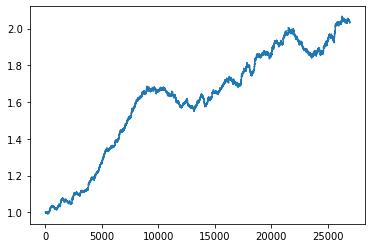

In [86]:
rc.profit.plot()

In [34]:
o1.shape
ohlc = o1[:4,:,:]
vol = o1[-1:,:,:]
ohlc = (ohlc-ohlc_mean)/ohlc_std
vol = (vol-vol_mean)/vol_std
on1 = np.concatenate((ohlc,vol),axis=0).reshape((1,*o1.shape))

In [37]:
torch.Tensor(on1).shape

torch.Size([1, 5, 32, 32])

In [43]:
dg =output.tolist()[0]

In [46]:
aa = dg[0]<dg[2]

In [47]:
aa

True